### CMPINF 2100 Week 08 | Exploratory Data Analysis Projct:

In this notebook, I will perform the instructions needed to complete the EDA project assignment for this week:

### Sources:

* Downloadable zip folder with final project examples
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
* https://pandas.pydata.org/docs/reference/api/pandas.notna.html
* https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html


### Instructions:

** Predictive Modeling Discussion. Do not state the specific models you will use, but you MUST state: ** 
* a.	Are you working on a REGRESSION or CLASSIFICATION problem? 
* b.	Which variables are inputs? 
* c.	Which variables are responses/outputs/outcomes/targets?
* d.	Did you need to DERIVE the responses of interest by SUMMARIZING the available data? 
* e.	If so, what summary actions did you perform? 
* f.	Which variables are identifiers and should NOT be used in the models? 
* g.	Important: Answer this question after completing parts C and D. Return to this predictive modeling discussion section to answer the following: 
* i.	Which of the inputs do you think influence the response, based on your exploratory visualizations? Which exploratory visualization helped you identify potential input-to-output relationships? (If you are not sure which inputs seem to influence the response, it is okay to say so.)

** Exploratory Data Analysis. Complete these general requirements: **
* Display number of rows and columns
* Display the column names and their associated data types
* Display the number of missing values in each column
* Display the number of unique values for each column

Additionaly: 

* "You must state whether you want to effectively treat a numeric column as a non-numeric for exploration purposes"
* "You do NOT need to display the COUNTS for categorical variables because you will visually display the variables. However, you may display/print COUNTS if it helps you"
* "You must visualize MARGINAL distributions for ALL variables in your data"
- Continuous variables: Histograms or density plots.
- Categorical variables: Bar Charts
* "You must decide appropriate visualizations to show:
- Categorical-to-categorical relationships (COMBINATIONS)
- Categorical-to-continuous relationships
- Continuous-to-continuous relationships
* "You must decide appropriate visualizations to show if RELATIONSHIPS change across GROUPS. This is especially important to continuous-to-continuous relationships. Do not forget though that categorical-to-continuous relationshipss can also be GROUPED BY a secondary categorical variable"
* "If you are working on a REGRESSION PROBLEM, you must:"
-  i.   Visualize the relationship between the continuous response and the continuous inputs using scatter plots and trend plots.
-  ii.	Group the relationships by categorical variables (if appropriate).
-  iii.	Summarize the response for each unique value of the categorical inputs using boxplots, violin plots, and point plots.
* "If you are working on a CLASSIFICATION problem, you must":
- i.	Visualize conditional distributions of the continuous inputs GROUPED BY the response (outcome) unique values.
- ii.	Visualize relationships between continuous inputs GROUPED BY the response (outcome) unique values.
- iii.	Visualize the counts of combinations between the response (outcome) and categorical inputs.

** Cluster Analysis: **
- NOTE: This is an initial attempt at cluster analysis to help you explore the data. You will also perform cluster analysis for the final project submission. The approach you use for the final project might be different from what you try now, but that is okay! Remember that this is just an initial attempt. See what you learn! If it does not seem to reveal anything “useful,” remind yourself that that is okay, and part of the learning process!
- You will NOT apply cluster analysis using ALL variables. Cluster analysis is UNSUPERVISED. It does NOT make distinctions between INPUTS and OUTPUTS. However, the projects are PREDICTIVE ANALYTICS problems with INPUTS and OUTPUTS. Therefore, you will need to decide the class of variables on which you will focus in your cluster analysis.

Complete the following setup steps before the requirements that follow. 

Select variables. You MUST state which class of variables you used in your cluster analysis. For example, you could:
- i.	Cluster using CONTINUOUS inputs.
- ii.	Cluster using CONTINUOUS responses (if you have multiple outputs).
- iii.	Cluster using multiple summary statistics derived from inputs. For example, if your data includes MANY categorical variables consider GROUPING BY them and SUMMARIZING the OTHER inputs. Summary statistics to consider: number of unique values, mean, standard deviation, median, etc. 
*	If you do this, do NOT start by creating COMBINATIONS of ALL categorical inputs. Select a few which provide many COMBINATIONS.
iv.	Cluster using multiple summary statistics derived from the outputs. For example, if your data includes MANY categorical variables consider GROUPING BY them and SUMMARIZING the outputs. Summary statistics to consider: number of unique values, mean, standard deviation, median, etc. 
*  If you do this, do NOT start by creating COMBINATIONS of ALL categorical inputs. Select a few which provide many COMBINATIONS.

Consider the following for your cluster analysis: 
- i.	How many variables are you using relative to the number of observations?
- ii.	Are the variables you are using “Gaussian-like” or are the distributions “odd looking”? You must visualize the MARGINAL histograms of the variables IF you are using summary statistics derived from INPUTS or OUTPUTS. If you are using the INPUTS or OUTPUTS directly, you already visualized the MARGINAL distributions.
- iii.	Are the variables you are using highly correlated to each other? You must visualize the relationships between the variables you are using. If you are using the INPUTS/OUTPUTS directly then you already visualized those relationships.
- iv.	How should you handle missing values? If you drop all rows with at least one missing value, how many observations would you still have (thus, how many complete cases do you have)?

You must use KMeans to execute the Cluster analysis.

First, use 2 clusters and:
- i.	Count the number of observations per identified cluster. Are the clusters balanced?
- ii.	Visualize the cluster results between 2 of the variables used for the cluster analysis.

Then, identify the optimal number of clusters, and rerun KMeans for the optimal number.

- i.	Count the number of observations per identified cluster.
- ii.	Visualize the cluster results between 2 of the variables used for the cluster analysis.

Interpret: 

- i.	Do the OPTIMAL number of clusters ALIGN with CATEGORIES of KNOWN grouping variables in your data?
* 	If you are working on a CLASSIFICATION problem, are the identified clusters consistent with the outcome categories?
*	If you are working on a REGRESSION problem, are the identified clusters consistent with categories of a categorical input?

- ii.	What are the CONDITIONAL distributions of the variables you used for clustering GIVEN the identified clusters?
*	Use appropriate visualizations to study the CONDITIONAL distributions of the variables used for clustering GROUPED BY the identified clusters.
*	HINT: you are creating CONDITIONAL distributions using the DERIVED cluster groupings rather than using a “real” categorical variable.
*	Describe the clusters based on the CONDITIONAL distributions.


### Beggining of the Discussion:

### Problem A.a.
We will be working with Regression for this problem.

* Import Modules
* Read the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
songs_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

df = pd.read_csv( songs_url )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

#### Selecting the Input Variables:

Exploring the variables associated with the URL. The goal of this exploration is to predict a song's popularity based on the features associated with a song. 

#### Problem A.b.
Throughout exploration of the `df.info()`, we have a few different input variables:

* danceability
* energy
* loudness
* speechiness
* acousticness
* instrumentalness
* liveness
* valence
* tempo

We can also assume that our identifiers include:

* track_id
* track_album_id
* playlist_id

#### Problem A.c.

Our output/response will be `total_popularity`, but we also have categorical inputs:

* playlist_genre
* playlist_subgenre

The data set carries several variables that act as IDs for the songs in the data. There are also other variables that work to identify details about the songs associated playlist. There is also an integer variable for `duration_ms` which might tie into our exploration when needed. We can explore the `track_id` in more detail as the GitHub src describes this variable to be a unique song ID.

In [5]:
df.track_id.nunique()

28356

Using `df.track_id.nunique()` we can explore each unique value associated with the variable. Notice that the number of unique track IDs are different from the number of rows in the data set. This may indicate duplication within the rows!

Let's explore more of the `track_id` to see what is happening with the unique values of our data set. We can call `value_counts()` to explore the number of unique values in the data. Note: `value_counts()` ignores missing values by default. Calling value counts twice will alter how the function acts, calling `df.track_id.value_counts()` will return what we had stated before. However, calling `value_counts().value_counts()` will return the number of songs that have that number of rows associated with them!

In [6]:
df.track_id.value_counts()

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
14sOS5L36385FJ3OL8hew4     9
3eekarcy7kvN4yt5ZFzltW     9
2Fxmhks0bxGSBdJ92vM42m     8
2tnVG71enUj33Ic2nFN6kZ     8
                          ..
3AKwyujeGxTQSZNbx9Ka3c     1
3ITvHA9zhZZdBJsOsAUegF     1
5gsW8TMmNVnevjq13h0Nlp     1
4pN4icvWINm9uN3bElfbec     1
29zWqhca3zt5NsckZqDf6c     1
Name: count, Length: 28356, dtype: int64

In [7]:
df.track_id.value_counts().value_counts()

count
1     25190
2      2384
3       510
4       142
5        60
6        35
7        17
8        15
9         2
10        1
Name: count, dtype: int64

Here we can notice a few different things:

* Calling `value_counts()` once allows us to see that the track_id name doesn't have a direct recognition pattern (example: it isn't as simple as an abbreviation of the songs description)
* We can see by calling `value_counts().value_counts()`, there are 25,190 songs with one row, but there is 1 song with 10 rows associated with it!

Questions to explore:
- Are songs with more rows associated with them more popular?
- How does a higher row count affect the songs popularity?

Let's continue to explore the variable associated with 10 rows as there is only one value that does this. There are a multitude of ways to identify this variable, but we have already identified the only `track_id` that this occurs for with the `value_counts()` methods from above.

In [8]:
df.loc[df.track_id.isin(df.track_id.value_counts()[df.track_id.value_counts()==10].index.to_list()), :]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960


After creating a list of the 10 rows associated with the `track_id`, we can see that the song is by the same exact artist(s), group, and have all of the same details. What is different about the data entry of this song is that it is associated with 10 different playlist(and their playlist id's of course)! We have 25,190 `track_id` that are completely unique while we have 1 song that has 10 different characteristics (in this case, the track is in 10 different playlist).

Notes: Could associating the song with a multitude of playlist increase popularity? 

Let's explore the middle-ground of our data and view the differences in songs with 5 row entries. We will first issolate a few track ids and explore those specific ids for simularities, as well as compare them to "Closer" by The Chainsmokers (our 10 row track id).

In [9]:
df.track_id.value_counts()[df.track_id.value_counts()==5][:3]

track_id
4qqArAiTPueDxIp7cf87h7    5
3TKpJrY9q49Mj1JOsM9zGL    5
25sgk305KZfyuqVBQIahim    5
Name: count, dtype: int64

In [10]:
df.loc[df.track_id.isin(df.track_id.value_counts()[df.track_id.value_counts()==5][:3].index.to_list()),:].sort_values('track_popularity')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
592,4qqArAiTPueDxIp7cf87h7,Final Song,MØ,71,2gcqSlK5xTxcpuLZ1iik3Z,Final Song,2016-05-13,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,1,-6.109,0,0.0345,0.0140,0.000084,0.0756,0.245,104.988,235827
2843,4qqArAiTPueDxIp7cf87h7,Final Song,MØ,71,2gcqSlK5xTxcpuLZ1iik3Z,Final Song,2016-05-13,ElectroPop 2020,4frhr6RQM2fMOm2mpvOVo6,pop,...,1,-6.109,0,0.0345,0.0140,0.000084,0.0756,0.245,104.988,235827
4046,4qqArAiTPueDxIp7cf87h7,Final Song,MØ,71,2gcqSlK5xTxcpuLZ1iik3Z,Final Song,2016-05-13,POPTIMISM,6lWMi4lPiiPwDqn8ZpeyAY,pop,...,1,-6.109,0,0.0345,0.0140,0.000084,0.0756,0.245,104.988,235827
17312,4qqArAiTPueDxIp7cf87h7,Final Song,MØ,71,2gcqSlK5xTxcpuLZ1iik3Z,Final Song,2016-05-13,Tropical Morning,0vbtbmyihyvl2MVYrdKdGw,latin,...,1,-6.109,0,0.0345,0.0140,0.000084,0.0756,0.245,104.988,235827
30975,4qqArAiTPueDxIp7cf87h7,Final Song,MØ,71,2gcqSlK5xTxcpuLZ1iik3Z,Final Song,2016-05-13,EDM/POP,6gHk5RFrnALbDNJdaXKivi,edm,...,1,-6.109,0,0.0345,0.0140,0.000084,0.0756,0.245,104.988,235827
541,3TKpJrY9q49Mj1JOsM9zGL,Family,The Chainsmokers,85,01GR4NL5O5CZM51k0aejKD,World War Joy,2019-12-06,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,11,-6.605,1,0.0356,0.4260,0.000000,0.1010,0.374,117.817,194827
16725,3TKpJrY9q49Mj1JOsM9zGL,Family,The Chainsmokers,85,01GR4NL5O5CZM51k0aejKD,World War Joy,2019-12-06,Tropical House 🏝 2020 Hits,2SRbIs0eBQwHeTP7kErjwo,latin,...,11,-6.605,1,0.0356,0.4260,0.000000,0.1010,0.374,117.817,194827
23174,3TKpJrY9q49Mj1JOsM9zGL,Family,The Chainsmokers,85,01GR4NL5O5CZM51k0aejKD,World War Joy,2019-12-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,3xMQTDLOIGvj3lWH5e5x6F,r&b,...,11,-6.605,1,0.0356,0.4260,0.000000,0.1010,0.374,117.817,194827
28804,3TKpJrY9q49Mj1JOsM9zGL,Family,The Chainsmokers,85,01GR4NL5O5CZM51k0aejKD,World War Joy,2019-12-06,Dancefloor Beats,6mMk6QCzEgT3QGaCV1R4S5,edm,...,11,-6.605,1,0.0356,0.4260,0.000000,0.1010,0.374,117.817,194827
29613,3TKpJrY9q49Mj1JOsM9zGL,Family,The Chainsmokers,85,01GR4NL5O5CZM51k0aejKD,World War Joy,2019-12-06,EDM House & Dance,5CTzufLc0f6MufjKYrIaoO,edm,...,11,-6.605,1,0.0356,0.4260,0.000000,0.1010,0.374,117.817,194827


We can see through the exploration of these three track ids with 5 rows, the playlist variables seem to be the culprit to the number of rows associated with the `track_id`. Let's continue to explore the `playlist_id` variable, and identify the number of unique values in this variable.

In [11]:
df.playlist_id.nunique()

471

In [12]:
df.groupby(['track_id', 'playlist_id']).size().reset_index(name='row_cnt')

,track_id,playlist_id,row_cnt
0,0017A6SJgTbfQVU2EtsPNo,37i9dQZF1DWYDQ8wBxd7xt,1
1,002xjHwzEx66OWFV2IP9dk,0JmBB9HfrzDiZoPVRdv8ns,1
2,004s3t0ONYlzxII9PLgU6z,3YouF0u7waJnolytf9JCXf,1
3,008MceT31RotUANsKuzy3L,5TiiHps0hNCyQ6ijVkNZQs,1
4,008rk8F6ZxspZT4bUlkIQG,37i9dQZF1DXdOtZGKonFlM,1
...,...,...,...
32246,7zxRMhXxJMQCeDDg0rKAVo,6HaCi9bqaiuSZEDfCEmwyo,1
32247,7zyLObYw4QUKQDyZOb4J0Y,4sji14lrB5bgcr51lPALYH,1
32248,7zycSpvjDcqh6YT1FEl2kY,1kEczIkZH8IgaWT2BiApxZ,1
32249,7zye9v6B785eFWEFYs13C2,5EMARioe9z9eKOeWIAC2JW,1


In [13]:
df.groupby(['track_id', 'playlist_id']).size().reset_index(name='row_cnt').row_cnt.value_counts()

row_cnt
1    31719
2      482
3       50
Name: count, dtype: int64

#### Problem A.f.

Identifiers: 
* track_id
* track_album_id
* playlist_id

Remeber when we explored the data from before, there were a total of 32833. Of those 32833 total, there are 32251 rows that have unique `track_id` and `playlist_id`, but what about the tracks associated `track_album_id`? If we were able to explore tracks that had one row associated with all three of these variables, we should be able to identify the number of one-of-one rows (completely unique rows to themselves, and not duplicated). 

Note: 

Artist can sometimes release songs as a single tied to an album that is only the single album, and then tie that song into an upcoming album release as well

Artist may also remix the song, but this should asssociate the song with a new `track_id`, so we can disregard this concern.

In [14]:
df.groupby(['track_id', 'playlist_id', 'track_album_id']).size().reset_index(name='row_cnt').row_cnt.value_counts()

row_cnt
1    31719
2      482
3       50
Name: count, dtype: int64

Notice that by applying `.value_counts()` to `row_cnt` associated with the variables `track_id` and `playlist_id`, as well as incorporating all three variables (track id, track album id, and playlist id) we get a result of variables in both two and three rows. What does this mean for our data set?

1) Each row is not one unique song track. Rather songs with one row is most likely one track, from one album, and one playlist.
2) It is crucial that we notice there are 532 duplicated rows after issolating the neccessary variables for identifying unique data entries (we can count a row as a 'unique data entry')


Since we are working to predict the output of `track_popularity` with these features, it is important to note that we should clean the data set before exploring what correlates to the track popularity!

We can do this by using the `nunique()` method and apply it to the grouped and aggregated DataFrame (df). We know that all unique tracks should have a single `track_popularity` and a characteristic value. Let's use `liveness` in this example. 

In [15]:
df.groupby(['track_id']).\
aggregate(track_pop_cnt = ('track_popularity', 'nunique'),
          liveness_cnt = ('liveness', 'nunique')).\
reset_index().\
nunique()

track_id         28356
track_pop_cnt        1
liveness_cnt         1
dtype: int64

Let's check this again with another characteristic, this time we can use `energy`.

In [16]:
df.groupby(['track_id']).\
aggregate(track_pop_cnt = ('track_popularity', 'nunique'),
          energy_cnt = ('energy', 'nunique')).\
reset_index().\
nunique()

track_id         28356
track_pop_cnt        1
energy_cnt           1
dtype: int64

#### Problem A.d and Problem A.e.

We use `track_popularity` to derive responses, problem A.e. is N/A

#### Problem B.a-b.

Let's now create a data set that only focuses on the unique rows and drops all duplicated values!

In [17]:
df_use = df[df['track_id'].notna()]
unique_songs = df_use.loc[~df_use['track_id'].duplicated(keep='first')].copy()

In [18]:
unique_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28356 non-null  object 
 1   track_name                28352 non-null  object 
 2   track_artist              28352 non-null  object 
 3   track_popularity          28356 non-null  int64  
 4   track_album_id            28356 non-null  object 
 5   track_album_name          28352 non-null  object 
 6   track_album_release_date  28356 non-null  object 
 7   playlist_name             28356 non-null  object 
 8   playlist_id               28356 non-null  object 
 9   playlist_genre            28356 non-null  object 
 10  playlist_subgenre         28356 non-null  object 
 11  danceability              28356 non-null  float64
 12  energy                    28356 non-null  float64
 13  key                       28356 non-null  int64  
 14  loudness   

Here, we can see that we have created a value for our unique rows titled `unique_songs`. 

Our new list contains only unique rows and no duplicates! We can confirm this by checking `unique_songs.info()` and comparing it with our `nunique()` from earlier (which we found to be the same, therefore our isolation is confirmed to be working). 

Let's check some of the characteristics of the data set we will actually be working with.

In [19]:
print('rows','columns', unique_songs.shape)

rows columns (28356, 23)


We can check the data types in our created dataframe by using `.dtypes` (also outlined when we call `.info()` as well)

In [20]:
unique_songs.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

Check the number of missing values per column.

In [21]:
unique_songs.isna().sum().sort_values(ascending=False)

track_artist                4
track_album_name            4
track_name                  4
track_id                    0
key                         0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
danceability                0
energy                      0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_id              0
track_popularity            0
duration_ms                 0
dtype: int64

Let's check the number of unique values per each column.

In [22]:
unique_songs.nunique().sort_values(ascending=False)

track_id                    28356
track_name                  23449
track_album_id              22545
duration_ms                 19785
track_album_name            19743
tempo                       17684
track_artist                10692
loudness                    10222
instrumentalness             4729
track_album_release_date     4530
acousticness                 3731
liveness                     1624
valence                      1362
speechiness                  1270
energy                        952
danceability                  822
playlist_id                   470
playlist_name                 448
track_popularity              101
playlist_subgenre              24
key                            12
playlist_genre                  6
mode                            2
dtype: int64

Through exploration of our created `unique_songs`, we can notice that the most dominant characteristic are the tempo and loudness with over 10,000 unique entries. 

Let's look back at the details of our created dataframe:

In [23]:
unique_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  28356 non-null  object 
 1   track_name                28352 non-null  object 
 2   track_artist              28352 non-null  object 
 3   track_popularity          28356 non-null  int64  
 4   track_album_id            28356 non-null  object 
 5   track_album_name          28352 non-null  object 
 6   track_album_release_date  28356 non-null  object 
 7   playlist_name             28356 non-null  object 
 8   playlist_id               28356 non-null  object 
 9   playlist_genre            28356 non-null  object 
 10  playlist_subgenre         28356 non-null  object 
 11  danceability              28356 non-null  float64
 12  energy                    28356 non-null  float64
 13  key                       28356 non-null  int64  
 14  loudness   

From `unique_songs.info()` :

* Categoricals for Exploration = key, and mode
* Release Date = `track_album_release_date` , here we can visually explore more of the impact with date. As discussed in the example, not all will be covered in this course (as well as this notebook of course)
* Continuous Variables = dancibility, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo.
* Target Variable = `track_popularity`

Let's explore more of how Date (`track_album_release_date`) might correspond to variables in the data, we will use the `pd.to_datetime()` function to convert the variable to a data time object and explore the first 10 rows:

In [24]:
pd.to_datetime(unique_songs.track_album_release_date[:10])

0   2019-06-14
1   2019-12-13
2   2019-07-05
3   2019-07-19
4   2019-03-05
5   2019-07-11
6   2019-07-26
7   2019-08-29
8   2019-06-14
9   2019-06-20
Name: track_album_release_date, dtype: datetime64[ns]

Now, we will copy the data set and add the a new variable `track_album_release_date_dt` for the datetime converted variable.

In [25]:
unique_songs_copy=unique_songs.copy() 
unique_songs_copy['track_album_release_date_dt']=pd.to_datetime(
    unique_songs_copy['track_album_release_date'],
    format='mixed',
    errors='coerce'
)

In [26]:
unique_songs_copy.loc[:10, ['track_id', 'track_album_release_date', 'track_album_release_date_dt']]

,track_id,track_album_release_date,track_album_release_date_dt
0,6f807x0ima9a1j3VPbc7VN,2019-06-14,2019-06-14
1,0r7CVbZTWZgbTCYdfa2P31,2019-12-13,2019-12-13
2,1z1Hg7Vb0AhHDiEmnDE79l,2019-07-05,2019-07-05
3,75FpbthrwQmzHlBJLuGdC7,2019-07-19,2019-07-19
4,1e8PAfcKUYoKkxPhrHqw4x,2019-03-05,2019-03-05
5,7fvUMiyapMsRRxr07cU8Ef,2019-07-11,2019-07-11
6,2OAylPUDDfwRGfe0lYqlCQ,2019-07-26,2019-07-26
7,6b1RNvAcJjQH73eZO4BLAB,2019-08-29,2019-08-29
8,7bF6tCO3gFb8INrEDcjNT5,2019-06-14,2019-06-14
9,1IXGILkPm0tOCNeq00kCPa,2019-06-20,2019-06-20


In [27]:
unique_songs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     28356 non-null  object        
 1   track_name                   28352 non-null  object        
 2   track_artist                 28352 non-null  object        
 3   track_popularity             28356 non-null  int64         
 4   track_album_id               28356 non-null  object        
 5   track_album_name             28352 non-null  object        
 6   track_album_release_date     28356 non-null  object        
 7   playlist_name                28356 non-null  object        
 8   playlist_id                  28356 non-null  object        
 9   playlist_genre               28356 non-null  object        
 10  playlist_subgenre            28356 non-null  object        
 11  danceability                 28356 non-null  f

Very Important: Notice that the two columns from our `.loc` appears to be identical but are NOT!

We can see this when we call `.info()`, we can see that `track_album_release_date_dt` is a datetime data type! Let's explore only the info of the variables needed to explore date:

In [28]:
unique_songs_copy.loc[:10, ['track_id', 'track_album_release_date', 'track_album_release_date_dt']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     11 non-null     object        
 1   track_album_release_date     11 non-null     object        
 2   track_album_release_date_dt  11 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 352.0+ bytes


Here, we can see that there are two objects associated with datetime. These two objects are going to be date variables that help organize how the datetime function works.

Knowing that these two objects are here and are attributes of datetime, we can extract the year and month within the release date of the row!

We will use `.dt.year` and `.dt.month` for this:

In [29]:
unique_songs_copy['release_year']=unique_songs_copy.track_album_release_date_dt.dt.year

In [30]:
unique_songs_copy['release_month']=unique_songs_copy.track_album_release_date_dt.dt.month

In [31]:
unique_songs_copy.loc[:10, ['track_id', 'track_album_release_date', 'track_album_release_date_dt', 'release_year', 'release_month']]

,track_id,track_album_release_date,track_album_release_date_dt,release_year,release_month
0,6f807x0ima9a1j3VPbc7VN,2019-06-14,2019-06-14,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,2019-12-13,2019-12-13,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,2019-07-05,2019-07-05,2019,7
3,75FpbthrwQmzHlBJLuGdC7,2019-07-19,2019-07-19,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,2019-03-05,2019-03-05,2019,3
5,7fvUMiyapMsRRxr07cU8Ef,2019-07-11,2019-07-11,2019,7
6,2OAylPUDDfwRGfe0lYqlCQ,2019-07-26,2019-07-26,2019,7
7,6b1RNvAcJjQH73eZO4BLAB,2019-08-29,2019-08-29,2019,8
8,7bF6tCO3gFb8INrEDcjNT5,2019-06-14,2019-06-14,2019,6
9,1IXGILkPm0tOCNeq00kCPa,2019-06-20,2019-06-20,2019,6


Let's start to visualize some of the data

* we can count the number of songs with each release year in `unique_songs_copy()`
* we can count the number of songs released in each month

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


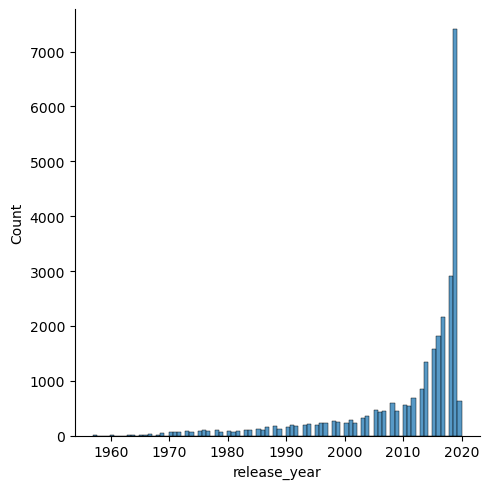

In [32]:
sns.displot(data=unique_songs_copy, x='release_year', kind='hist')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


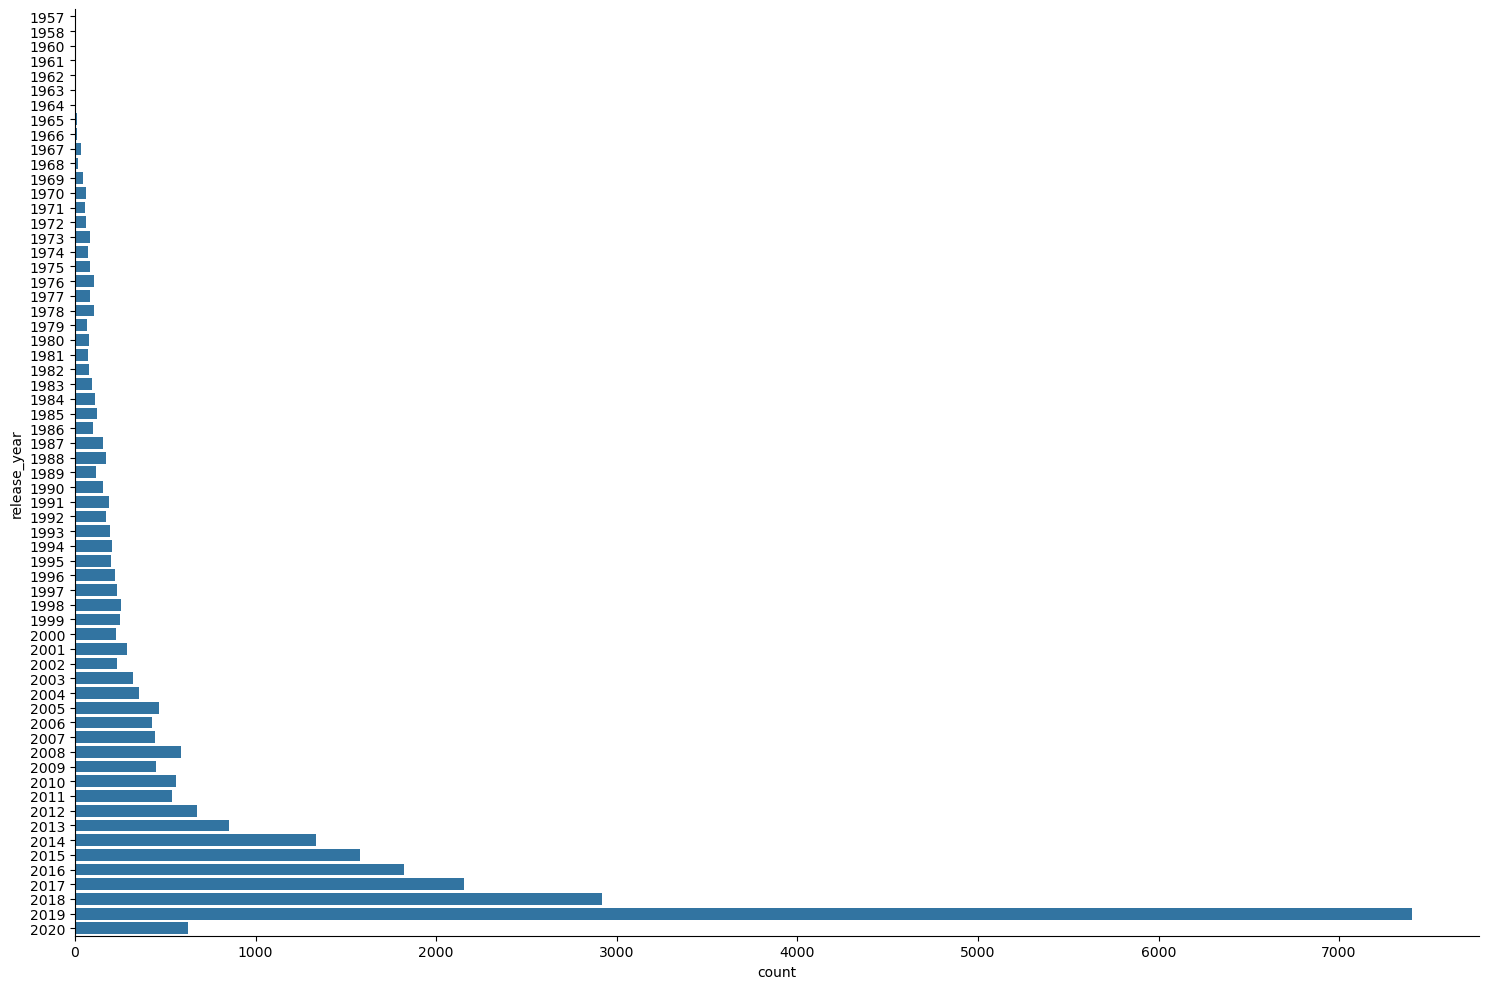

In [33]:
sns.catplot(data=unique_songs_copy, y='release_year', kind='count', height=10, aspect=1.5)

plt.show()

As shown in both of our graphs, we can see that a large majority of the releases were in 2019. This makes sense as our dataset focuses on Febuary of 2020 (not many new songs will have been released yet for that year).

Notes: 
* Does having a release closer to the files date cause for increase in `total_popularity` as they were released more recently?
* Likewise, if older songs are still apart of the data set, is it due to the number associated with their `total_popularity` score?

Let's visualize the `month` variable with `count`:

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


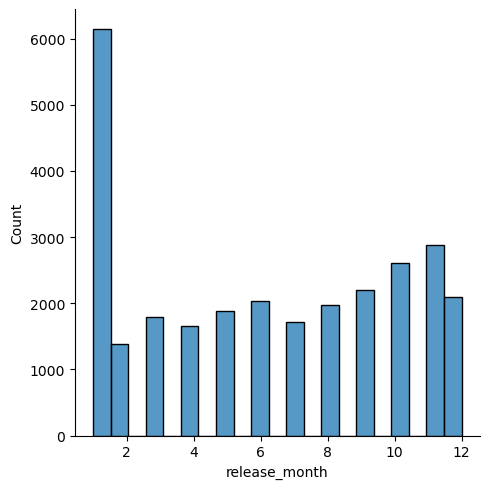

In [34]:
sns.displot(data=unique_songs_copy, x='release_month', kind='hist')
plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


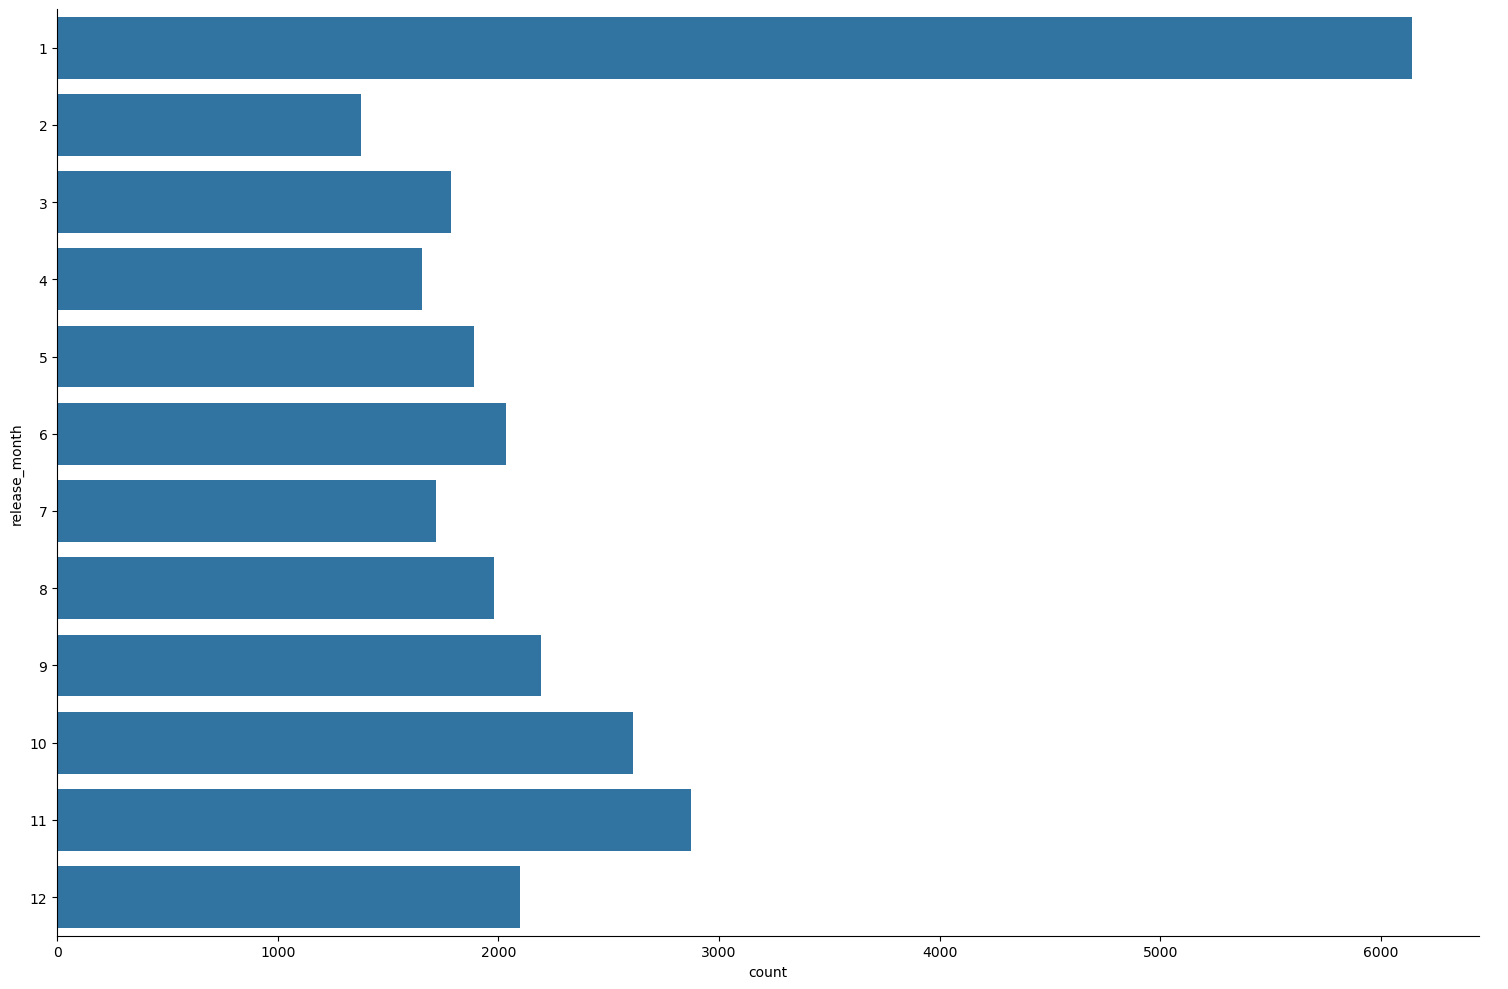

In [35]:
sns.catplot(data=unique_songs_copy, y='release_month', kind='count', height=10, aspect=1.5)

plt.show()

As we can see with the date, January seems to be a peak month for releasing music in this data, as well as 2019 being the dominant year of release by a landslide. 

We can also notice that after 2012, the number of rows associated with the years start to fluxuate more evenly and show a start to show a slight increase in release count as they approach 2012. Afterwhich, the release count climbs at an increased rate until 2020 (where there aren't as many released as the dataset focusues on Febuary of 2020). 

In [36]:
unique_songs_copy['year_of_release']=np.where(unique_songs_copy.release_year < 2010, '>last 10 years', 'last 10 years')

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


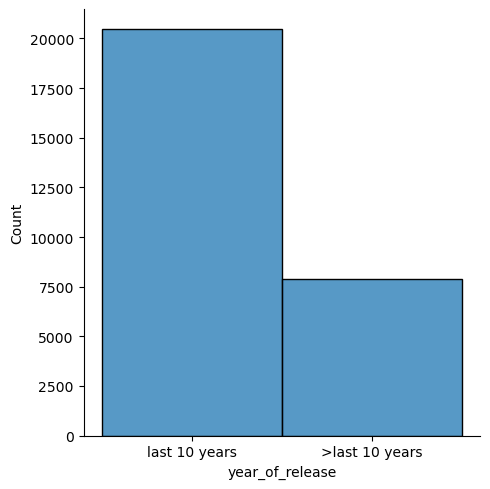

In [37]:
sns.displot(data=unique_songs_copy, x='year_of_release', kind='hist')

plt.show()

By creating a visualization that groups together release years, we are able to directly compare the last 10 years of releases (includes the current year), to that of older releases in the dataset. 

We can conclude that a vast majority of our data exist in the years of 2010 and up. Looking back at our other visualizations, we can see that the most that occur are in 2019 by a large amount. 

2019 has a release count of over 7,000+ while the next closest is the year before, 2018, falling just short of 3,000.

categorical variables: `key` and `mode`

In [38]:
unique_songs_copy.loc[:, ['key', 'mode']].nunique()

key     12
mode     2
dtype: int64

In [39]:
unique_songs_copy.loc[:, ['key', 'mode']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   key     28356 non-null  int64
 1   mode    28356 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


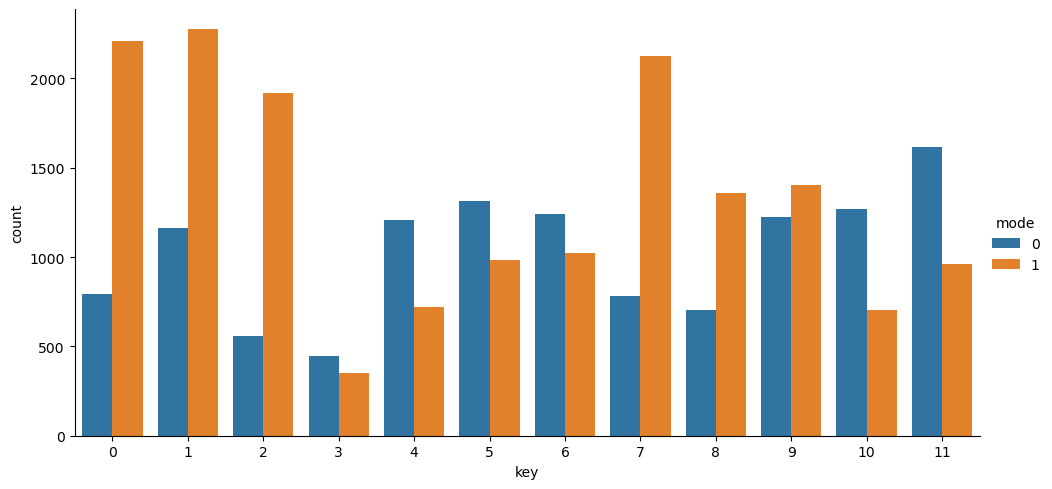

In [40]:
sns.catplot(data=unique_songs_copy, x='key', kind='count', hue='mode', aspect=2)

plt.show()

Here we can see that in the `key` measurements `0`, `1`, `2`, and 7 have a significant increase in `mode 1s` count as compared to `mode 0s` count

We can also see that in the `key` measurements `4`, `5`, and `11`, have an increase in `mode 0s` count as compared to `mode 1s` count, but not near as significant as the differences noticed from the detail above

Let' explore some of the continuous variables that we discussed earlier that we felt might be impactful:

In [41]:
unique_songs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     28356 non-null  object        
 1   track_name                   28352 non-null  object        
 2   track_artist                 28352 non-null  object        
 3   track_popularity             28356 non-null  int64         
 4   track_album_id               28356 non-null  object        
 5   track_album_name             28352 non-null  object        
 6   track_album_release_date     28356 non-null  object        
 7   playlist_name                28356 non-null  object        
 8   playlist_id                  28356 non-null  object        
 9   playlist_genre               28356 non-null  object        
 10  playlist_subgenre            28356 non-null  object        
 11  danceability                 28356 non-null  f

#### Problem B.c
Let's now get ready to explore our categorical variables, we will first convert them into categories (non-numeric)

In [42]:
unique_songs_copy['key'] = unique_songs_copy['key'].astype('category')
unique_songs_copy['mode'] = unique_songs_copy['mode'].astype('category')

In [43]:
unique_songs_copy[['key', 'mode']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   key     28356 non-null  category
 1   mode    28356 non-null  category
dtypes: category(2)
memory usage: 1.3 MB


#### Problem B.d. and B.e.

Let's explore the continuous variables first:

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


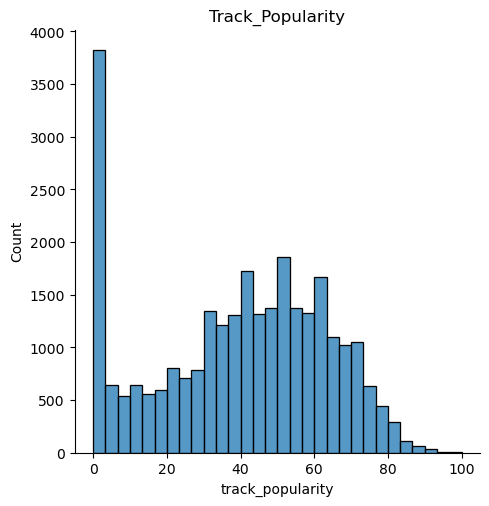

In [44]:
sns.displot(data=unique_songs_copy, x='track_popularity', kind='hist', bins=30)
plt.title('Track_Popularity'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


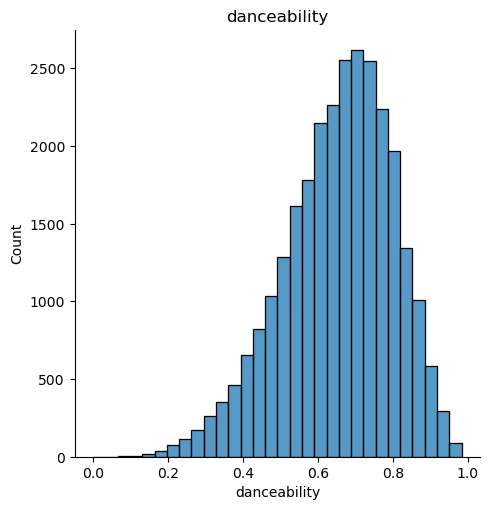

In [45]:
sns.displot(data=unique_songs_copy, x='danceability', kind='hist', bins=30)
plt.title('danceability'); plt.show()

In [46]:
unique_songs_copy.danceability.value_counts(dropna=False)

danceability
0.733    99
0.690    99
0.694    97
0.715    96
0.708    96
         ..
0.173     1
0.197     1
0.195     1
0.149     1
0.983     1
Name: count, Length: 822, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


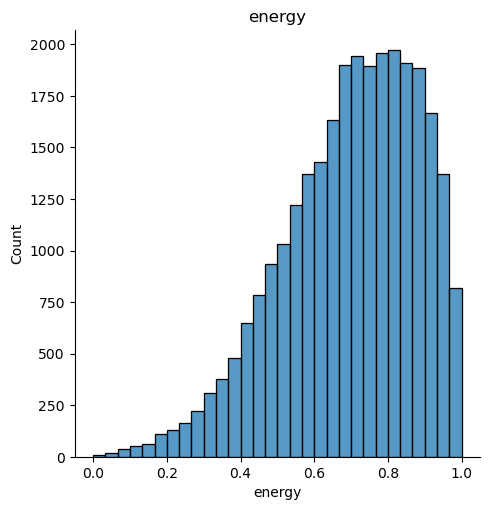

In [47]:
sns.displot(data=unique_songs_copy, x='energy', kind='hist', bins=30)
plt.title('energy'); plt.show()

In [48]:
unique_songs_copy.energy.value_counts(dropna=False)

energy
0.8330    86
0.7870    80
0.8280    79
0.7580    78
0.7110    75
          ..
0.1700     1
0.0644     1
0.0753     1
0.0881     1
0.1060     1
Name: count, Length: 952, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


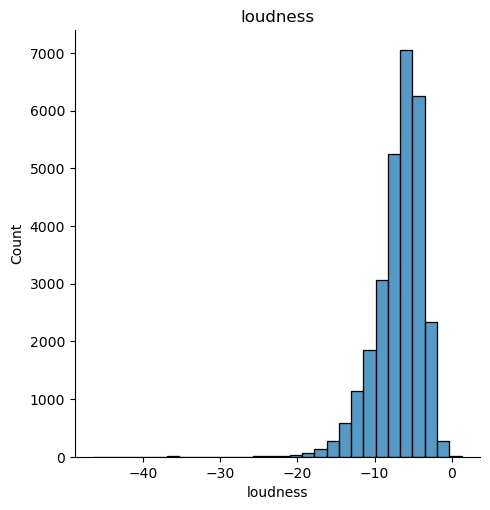

In [49]:
sns.displot(data=unique_songs_copy, x='loudness', kind='hist', bins=30)
plt.title('loudness'); plt.show()

In [50]:
unique_songs_copy.loudness.value_counts(dropna=False)

loudness
-5.824     15
-3.782     14
-4.973     14
-4.576     13
-5.131     13
           ..
-11.429     1
-11.999     1
-11.762     1
-14.340     1
-1.814      1
Name: count, Length: 10222, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


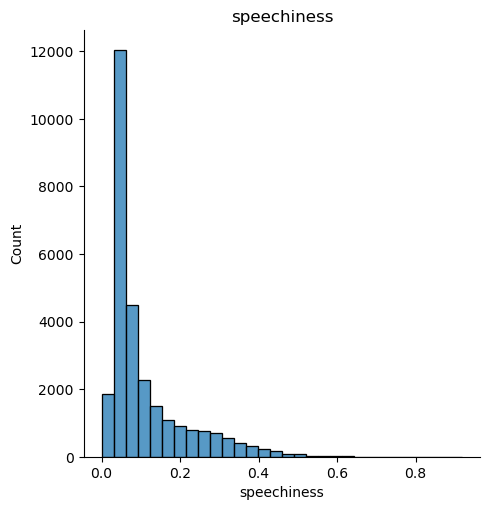

In [51]:
sns.displot(data=unique_songs_copy, x='speechiness', kind='hist', bins=30)
plt.title('speechiness'); plt.show()

In [52]:
unique_songs_copy.speechiness.value_counts(dropna=False)

speechiness
0.1030    90
0.1020    89
0.0354    79
0.1070    78
0.1120    77
          ..
0.8170     1
0.5710     1
0.6320     1
0.6360     1
0.5780     1
Name: count, Length: 1270, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


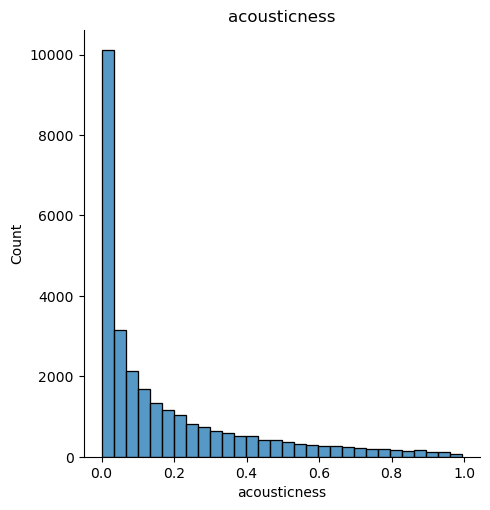

In [53]:
sns.displot(data=unique_songs_copy, x='acousticness', kind='hist', bins=30)
plt.title('acousticness'); plt.show()

In [54]:
unique_songs_copy.acousticness.value_counts(dropna=False)

acousticness
0.102000    68
0.107000    64
0.114000    61
0.101000    60
0.128000    60
            ..
0.000061     1
0.000078     1
0.000740     1
0.000043     1
0.000434     1
Name: count, Length: 3731, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


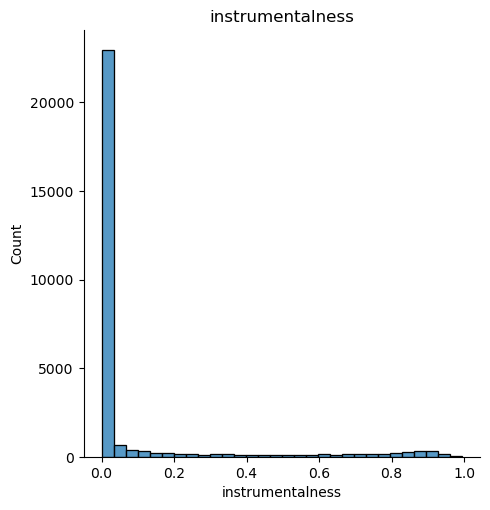

In [55]:
sns.displot(data=unique_songs_copy, x='instrumentalness', kind='hist', bins=30)
plt.title('instrumentalness'); plt.show()

In [56]:
unique_songs_copy.instrumentalness.value_counts(dropna=False)

instrumentalness
0.000000    10175
0.000010       21
0.124000       21
0.901000       20
0.001060       20
            ...  
0.000073        1
0.090800        1
0.000087        1
0.058300        1
0.008350        1
Name: count, Length: 4729, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


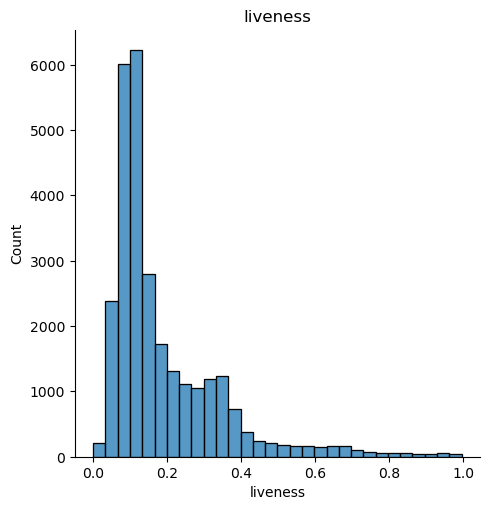

In [57]:
sns.displot(data=unique_songs_copy, x='liveness', kind='hist', bins=30)
plt.title('liveness'); plt.show()

In [58]:
unique_songs_copy.liveness.value_counts(dropna=False)

liveness
0.111    287
0.108    276
0.110    265
0.109    253
0.105    248
        ... 
0.847      1
0.914      1
0.935      1
0.813      1
0.787      1
Name: count, Length: 1624, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


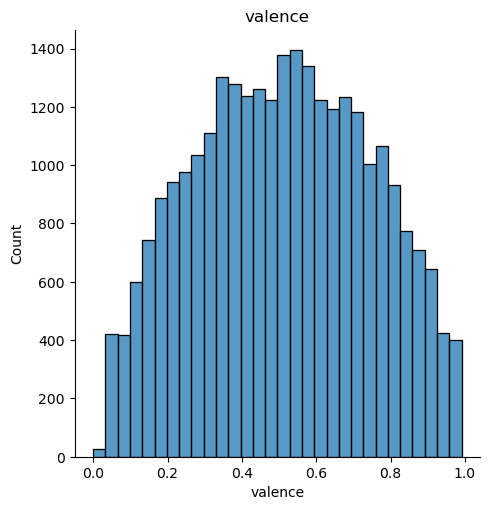

In [59]:
sns.displot(data=unique_songs_copy, x='valence', kind='hist', bins=30)
plt.title('valence'); plt.show()

In [60]:
unique_songs_copy.valence.value_counts(dropna=False)

valence
0.9610    61
0.4990    59
0.3890    56
0.5620    56
0.3470    54
          ..
0.9850     1
0.9780     1
0.0981     1
0.0447     1
0.0927     1
Name: count, Length: 1362, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


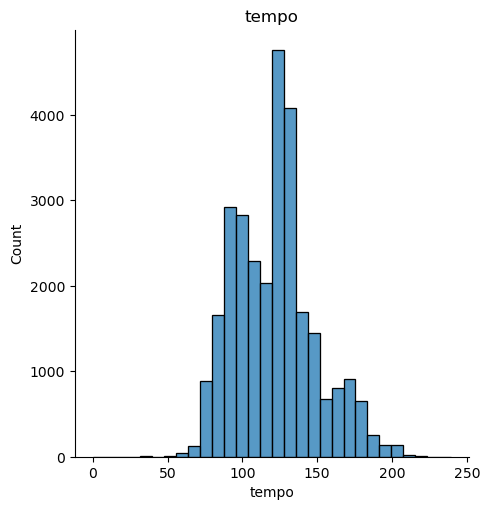

In [61]:
sns.displot(data=unique_songs_copy, x='tempo', kind='hist', bins=30)
plt.title('tempo'); plt.show()

In [62]:
unique_songs_copy.tempo.value_counts(dropna=False)

tempo
127.992    37
127.993    32
127.994    29
128.001    28
127.997    28
           ..
96.591      1
128.898     1
82.628      1
136.016     1
128.170     1
Name: count, Length: 17684, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


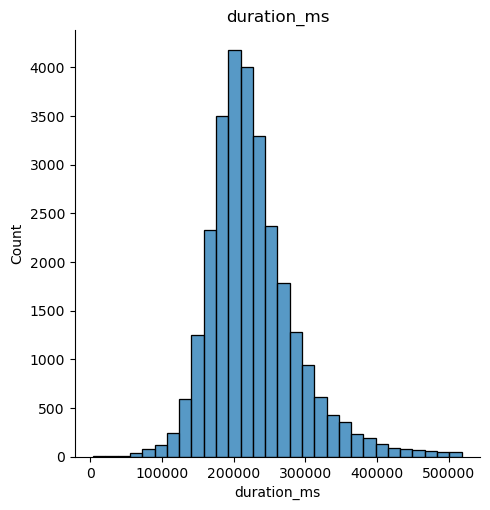

In [63]:
sns.displot(data=unique_songs_copy, x='duration_ms', kind='hist', bins=30)
plt.title('duration_ms'); plt.show()

In [64]:
unique_songs_copy.duration_ms.value_counts(dropna=False)

duration_ms
240000    35
192000    34
210000    29
180000    22
160000    22
          ..
213618     1
239604     1
242500     1
178422     1
367432     1
Name: count, Length: 19785, dtype: int64

##### Summary of Continuous:

* Duration clusters arround 3-4 min in length (200,000 ms = 3.33 min (roughly))
* Energy leans toward mid-high values
* Loudness counts are increasing from -10 to about -5 before starting to decrease until 0 is reached
* Acousticness is highly right-skewed
* Instrumentalness shows that there are very few instrumental tracks
* Tempo common range is 100-150 bpm and has a max peak around 125-130 bpm 
* Valence shows a majority of its count between 0.3 and 0.75 (roughly)
* Liveness peaks around 0.1

--------------
#### Categorical Variables:

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


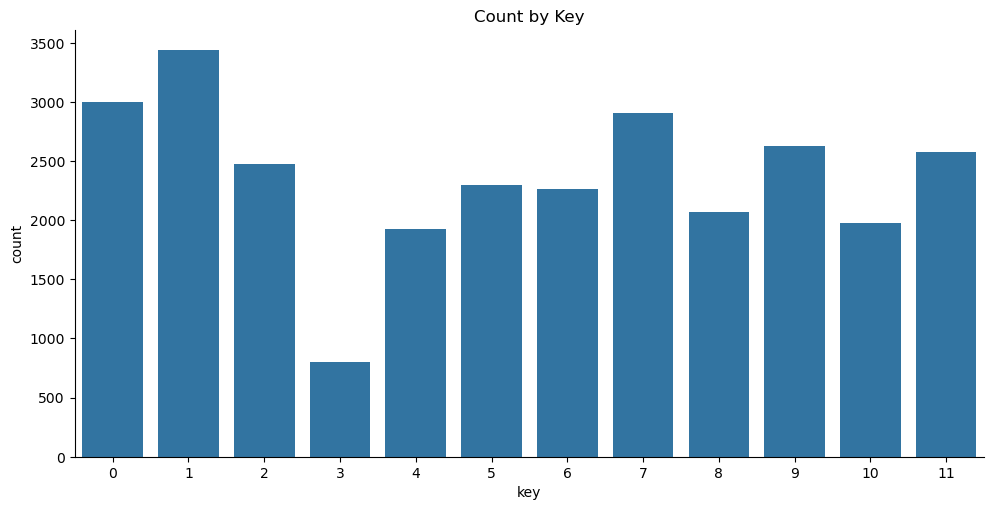

In [65]:
sns.catplot(data=unique_songs_copy, x='key', kind='count', aspect=2)
plt.title('Count by Key'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


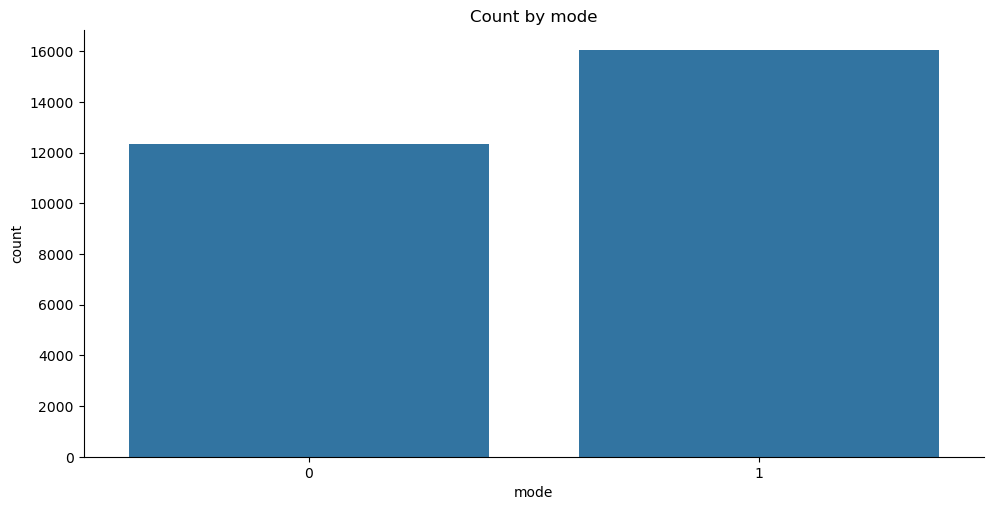

In [66]:
sns.catplot(data=unique_songs_copy, x='mode', kind='count', aspect=2)
plt.title('Count by mode'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


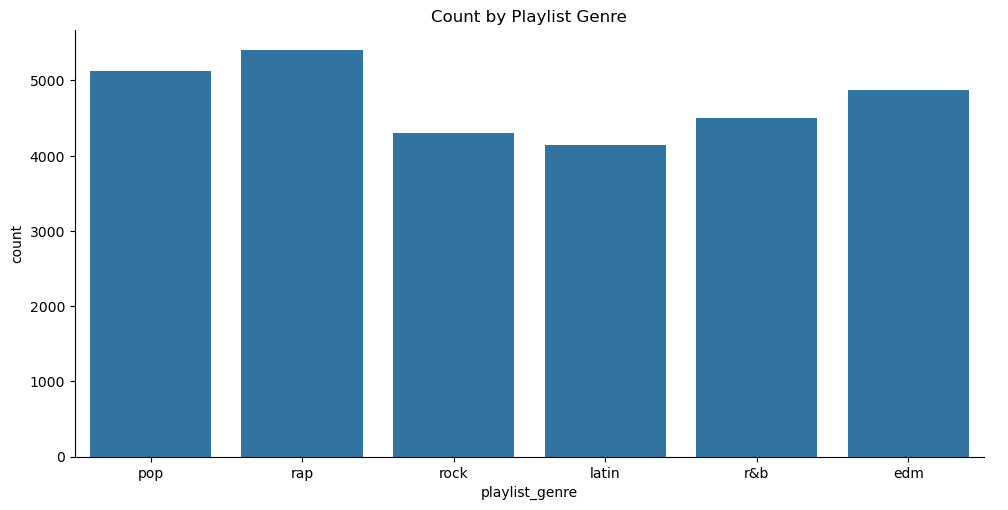

In [67]:
sns.catplot(data=unique_songs_copy, x='playlist_genre', kind='count', aspect=2)
plt.title('Count by Playlist Genre'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


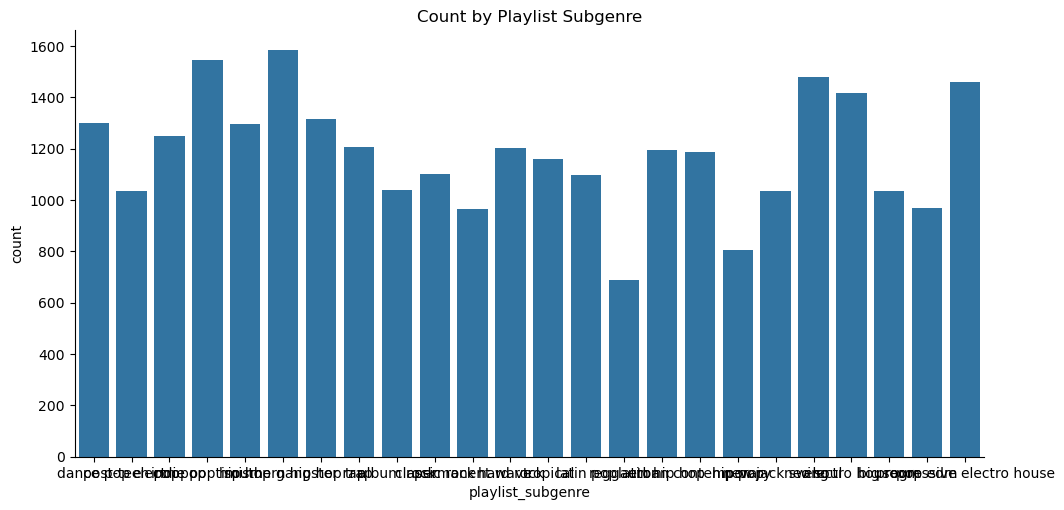

In [68]:
sns.catplot(data=unique_songs_copy, x='playlist_subgenre', kind='count', aspect=2)
plt.title('Count by Playlist Subgenre'); plt.show()

Let's continue exploring the categorical variables:

In [69]:
unique_songs_copy['key'].describe()

count     28356
unique       12
top           1
freq       3436
Name: key, dtype: int64

In [70]:
unique_songs_copy['mode'].describe()

count     28356
unique        2
top           1
freq      16035
Name: mode, dtype: int64

In [71]:
unique_songs_copy['playlist_genre'].describe()

count     28356
unique        6
top         rap
freq       5401
Name: playlist_genre, dtype: object

In [72]:
unique_songs_copy['playlist_subgenre'].describe()

count                28356
unique                  24
top       southern hip hop
freq                  1583
Name: playlist_subgenre, dtype: object

##### Summary of categorical variables:

* `Key` = the distribution was spread fairly even with the exception of 3 being lower than the rest by a larger difference than the rest, and the highest value was 1
* `Mode` = The counts of mode 0 and 1 were split fairly even with 1 being slightly higher
* `Playlist_Genre` =  There seems to be a good mix of different genres with Rap being the highest in count
* `Playlist_Subgenre` = Another fairly even spread with some counts lower than majorities, the highest count was with 'southern hip hop'

#### Problem B.f:

Let's look more at the effects of a categorical-to-categorical combo via. `pd.crosstab`

In [73]:
pd.crosstab(unique_songs_copy['key'], unique_songs_copy['mode'])

mode,0,1
key,,
0,794,2207
1,1162,2274
2,558,1920
3,447,350
4,1205,720
5,1315,986
6,1242,1020
7,780,2127
8,706,1360


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


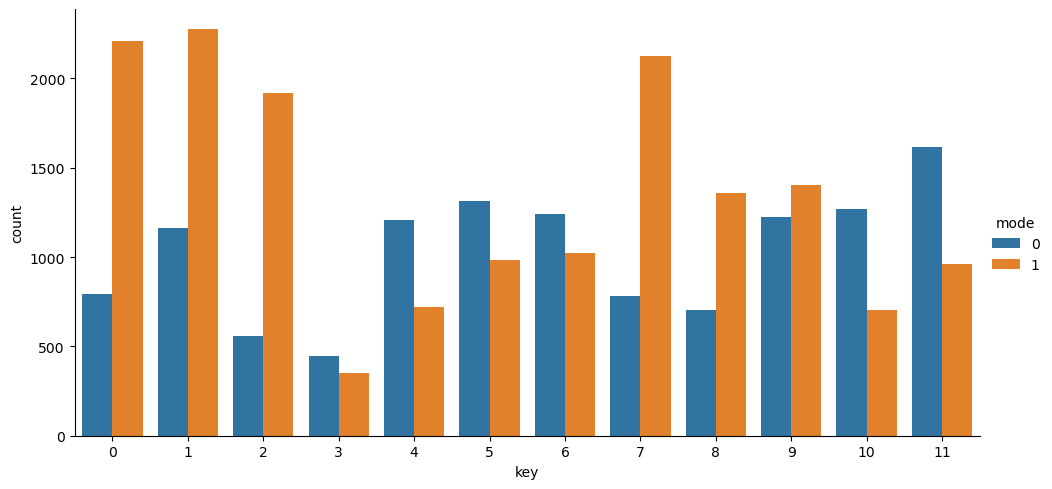

In [74]:
sns.catplot(data=unique_songs_copy, x='key', hue='mode', kind='count', aspect=2)
plt.show()

The table created by `pd.crosstab` shows us a direct count that is then visualized by `sns.catplot`.

We can see that the combinations of `mode: 1` + `key: 0, 1, 2, and 7` carry a count just shy of 2,000 or over!

Let's explore how the `track_popularity` distributions shift across these categories (categorical-continuous):

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


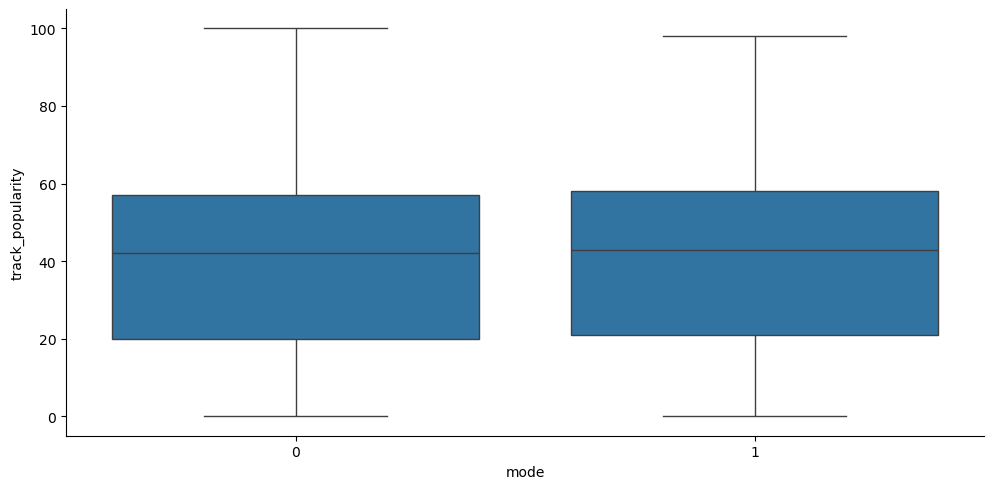

In [75]:
sns.catplot(data=unique_songs_copy, x='mode', y='track_popularity', kind='box', aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


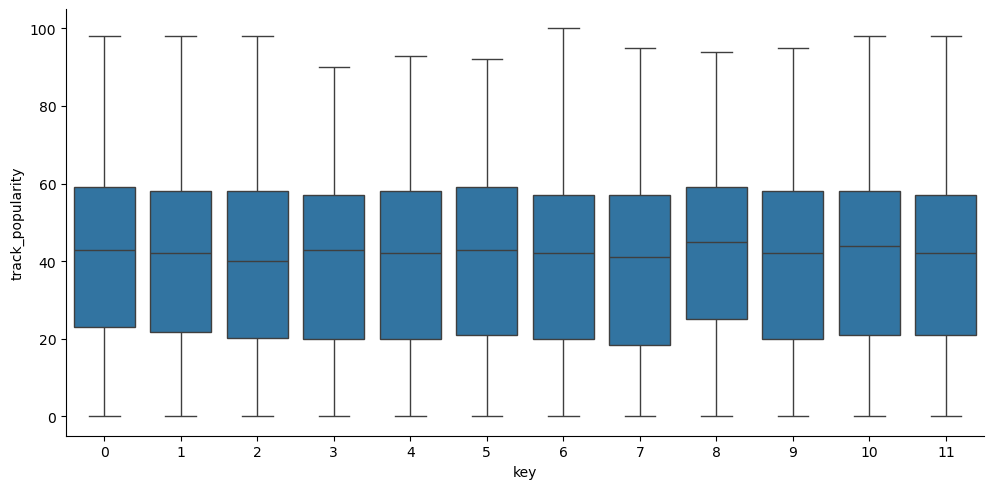

In [76]:
sns.catplot(data=unique_songs_copy, x='key', y='track_popularity', kind='box', aspect=2)

plt.show()

It seems that the track popularity is roughly following the same distribution across categorical variables when viewing the `track_popularity`

What about our other categorical variables such as the `playlist`?

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


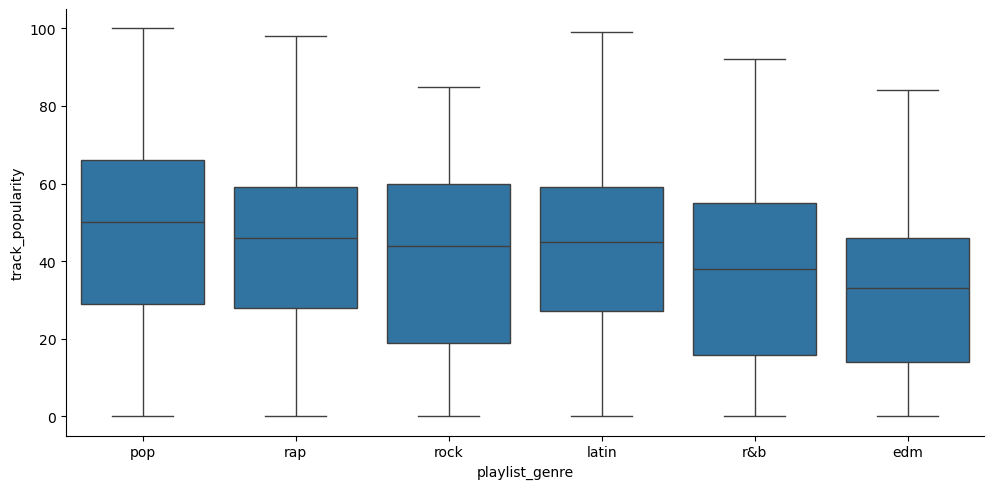

In [77]:
sns.catplot(data=unique_songs_copy, x='playlist_genre', y='track_popularity', kind='box', aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


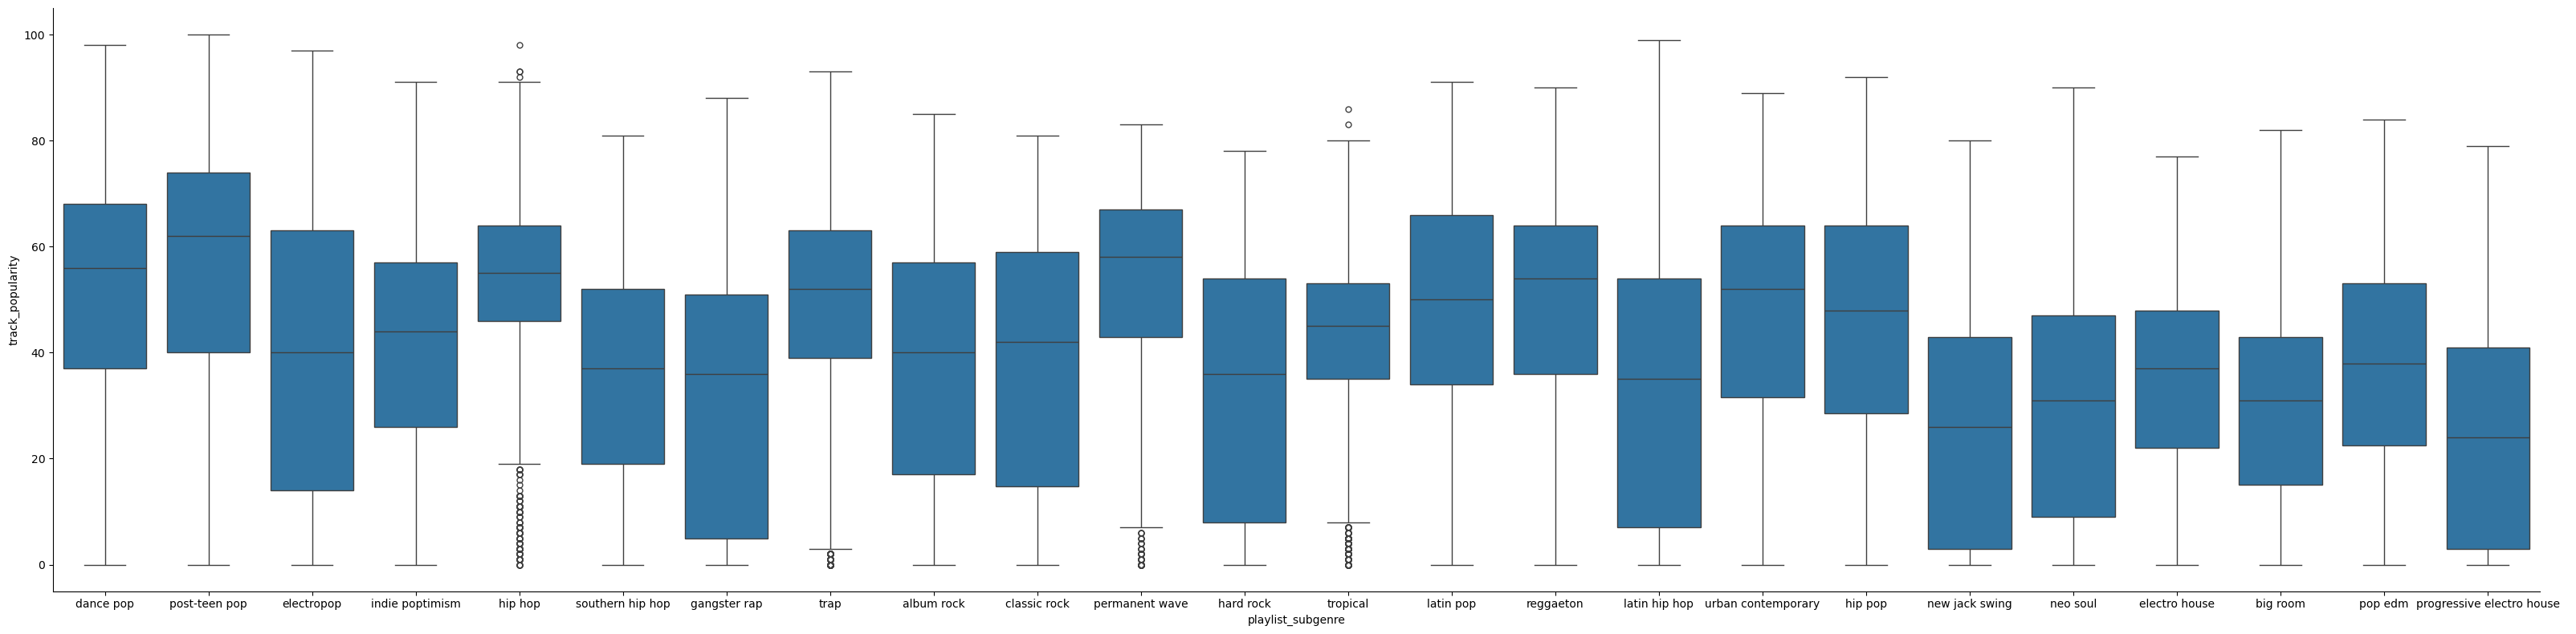

In [78]:
sns.catplot(data=unique_songs_copy, x='playlist_subgenre', y='track_popularity', kind='box', aspect=4, height=8)

plt.show()

In [79]:
unique_songs_copy.playlist_subgenre.value_counts()

playlist_subgenre
southern hip hop             1583
indie poptimism              1547
neo soul                     1478
progressive electro house    1460
electro house                1416
gangster rap                 1316
dance pop                    1298
hip hop                      1296
electropop                   1251
trap                         1206
hard rock                    1202
latin hip hop                1194
urban contemporary           1187
tropical                     1158
classic rock                 1100
latin pop                    1097
album rock                   1039
post-teen pop                1036
new jack swing               1036
big room                     1034
pop edm                       967
permanent wave                964
hip pop                       803
reggaeton                     688
Name: count, dtype: int64

By visualizing the distribution of `track_popularity` across the categorical variables, we can see that the playlist has a more spread distrubution than the other categorical variables

We can see that hip hop quite a few outliers in the graph as well as permanent wave and tropical

We can see that the averages of hip hop are both compact and high scoring, post teen pop and permanent wave seem to have the highest upper bounds in their averages for `track_popularity` as well

The distribution also shows that there are tracks that exist within the hip hop, latin hip hop, and post teen pop that reach a max score in thier `track_popularity`, it is important to note though that hip hop achieves this through an outlier in its data (as shown by the graph)

Let's now visualize some continuous-continous variables:

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


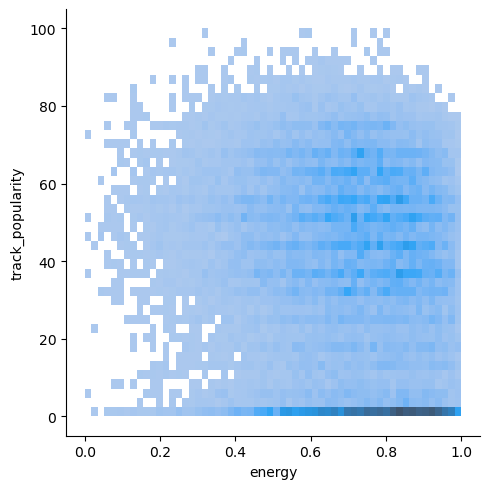

In [80]:
sns.displot(data=unique_songs_copy, x='energy', y='track_popularity', kind='hist')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


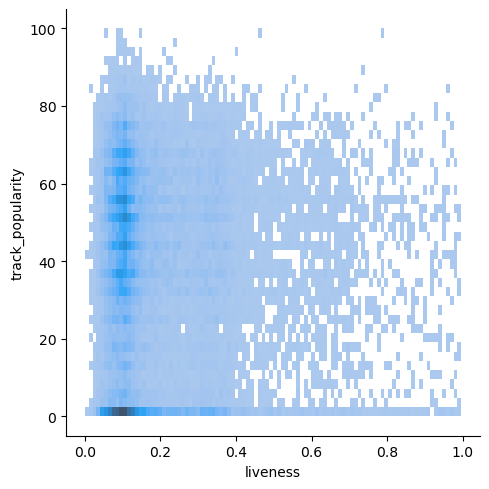

In [81]:
sns.displot(data=unique_songs_copy, x='liveness', y='track_popularity', kind='hist')

plt.show()

In [82]:
unique_songs_copy.energy.value_counts()

energy
0.8330    86
0.7870    80
0.8280    79
0.7580    78
0.7110    75
          ..
0.1700     1
0.0644     1
0.0753     1
0.0881     1
0.1060     1
Name: count, Length: 952, dtype: int64

In [83]:
unique_songs_copy.liveness.value_counts()

liveness
0.111    287
0.108    276
0.110    265
0.109    253
0.105    248
        ... 
0.847      1
0.914      1
0.935      1
0.813      1
0.787      1
Name: count, Length: 1624, dtype: int64

#### Problem B.g

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


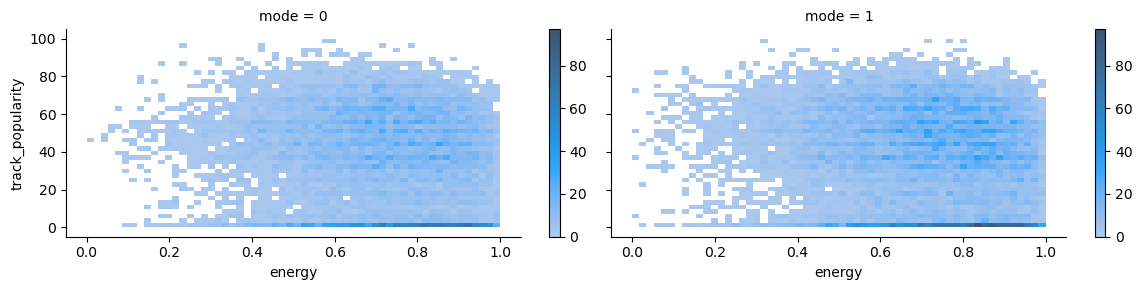

In [84]:
sns.displot(data=unique_songs_copy, x='energy', y='track_popularity', kind='hist', cbar=True, col='mode', height=3, aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


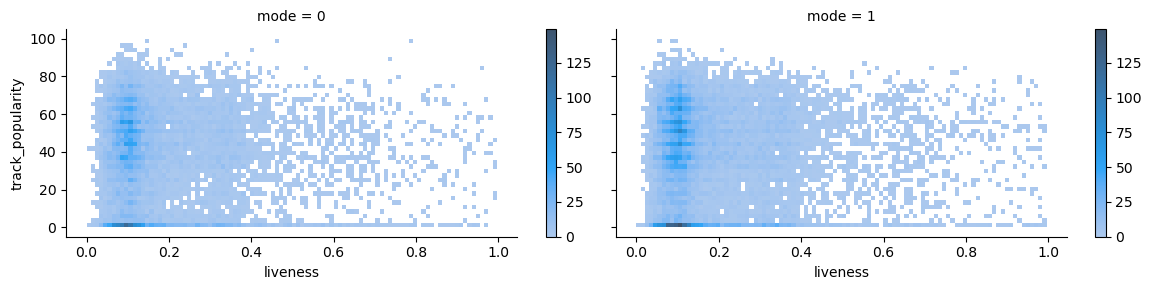

In [85]:
sns.displot(data=unique_songs_copy, x='liveness', y='track_popularity', kind='hist', cbar=True, col='mode', height=3, aspect=2)

plt.show()

We can also explore a categorical x variable, example: playlist genre

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


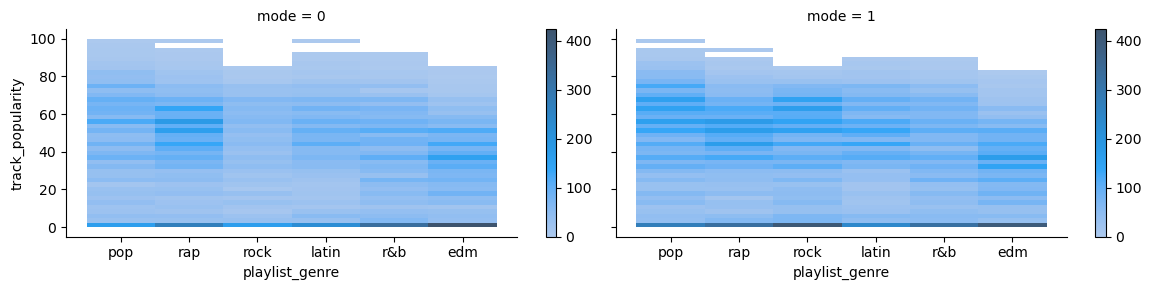

In [86]:
sns.displot(data=unique_songs_copy, x='playlist_genre', y='track_popularity', kind='hist', cbar=True, col='mode', height=3, aspect=2)

plt.show()

By using the visuals created, we can see that the darker the region is, the higher the rows are at that point. 

For example:

* Energy has more rows that exist between 0.65-0.85 than anywhere else
* Liveness has more rows that exist between 0.05 and 0.15 than anywhere else

Data that falls within those ranges have an average of higher track popularity than other areas as well. 

* We can also see that mode 0 has more genres that reach 100 track popularity, but mode 1 has a more generalized spread (most fall in the range of 50-70 track popularity, ignoring those that rest at 0)

Let's explore the output in more detail:

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


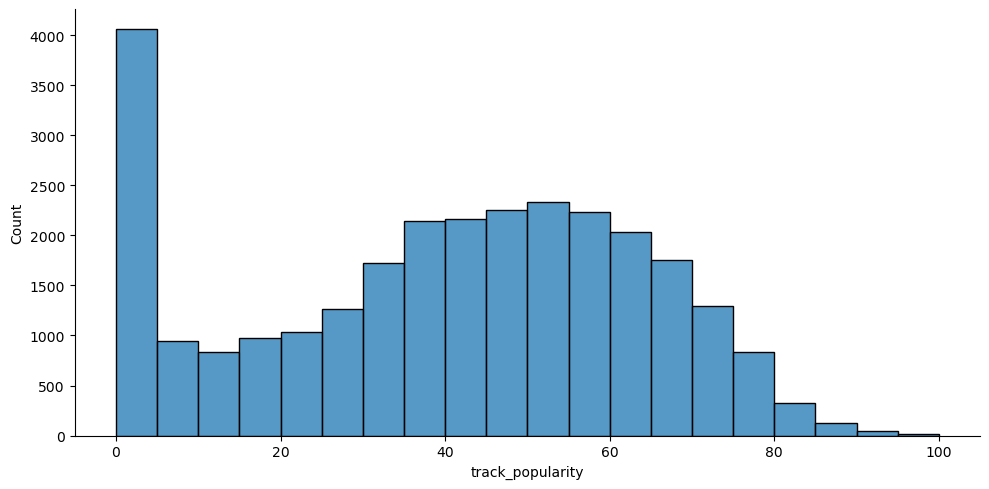

In [87]:
sns.displot(data = unique_songs_copy, x='track_popularity', binwidth=5, aspect=2)

plt.show()

In [88]:
unique_songs_copy.track_popularity.value_counts(dropna=False)

track_popularity
0      2620
1       546
51      484
57      479
54      474
       ... 
97        3
95        2
100       1
96        1
99        1
Name: count, Length: 101, dtype: int64

#### Problem B.h.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


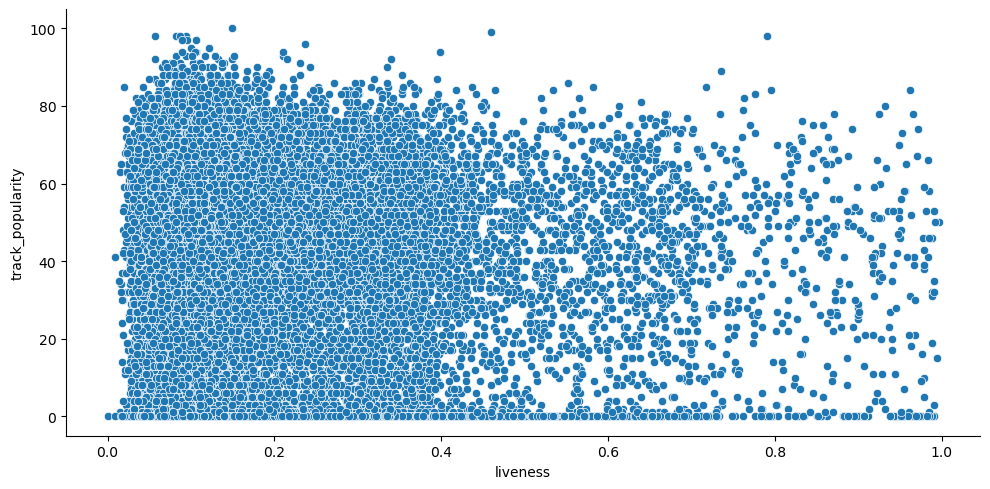

In [89]:
sns.relplot(data=unique_songs_copy, x='liveness', y='track_popularity', kind='scatter', aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


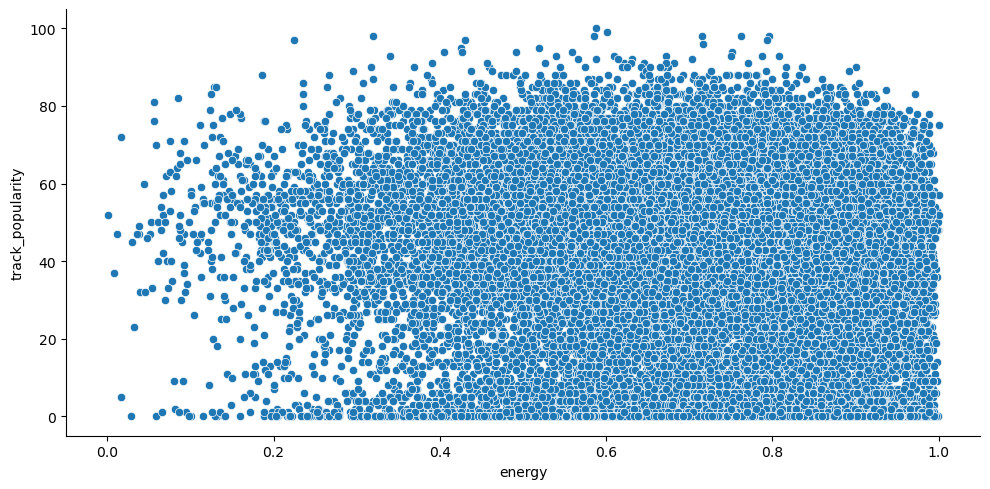

In [90]:
sns.relplot(data=unique_songs_copy, x='energy', y='track_popularity', kind='scatter', aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


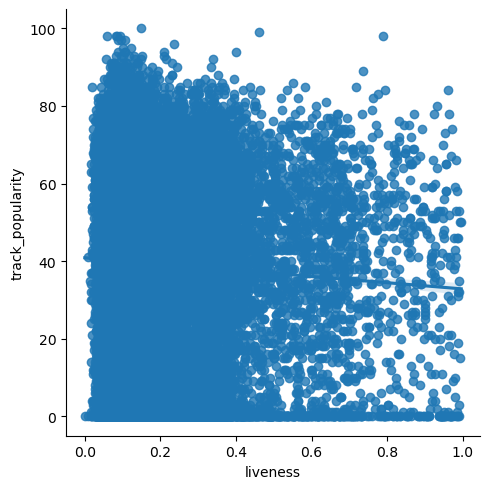

In [91]:
sns.lmplot(data=unique_songs_copy, x='liveness', y='track_popularity')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


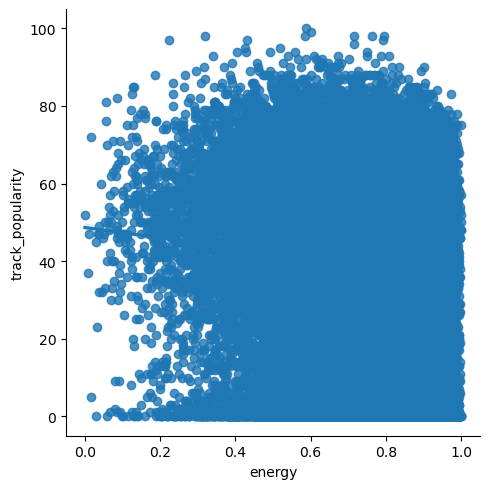

In [92]:
sns.lmplot(data=unique_songs_copy, x='energy', y='track_popularity')

plt.show()

Here, we can see that in increase in both liveness or energy results in a correlated decreses. This is also expressed by the trend line found in the `sns.lmplot` visualizations.

We can explore other variables to see if they play a simular effect with their trend lines!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


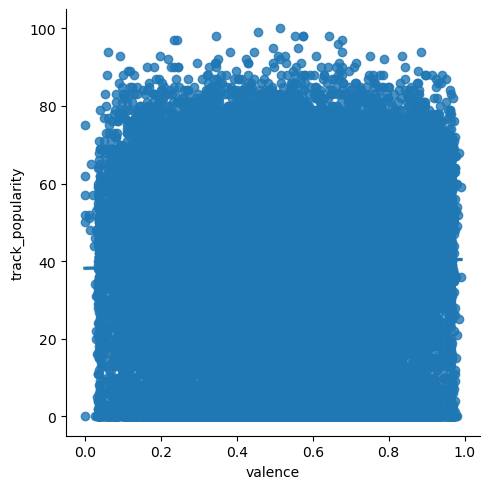

In [93]:
sns.lmplot(data=unique_songs_copy, x='valence', y='track_popularity')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


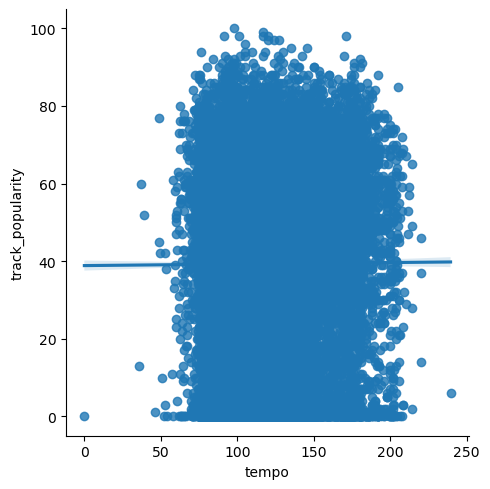

In [94]:
sns.lmplot(data=unique_songs_copy, x='tempo', y='track_popularity')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


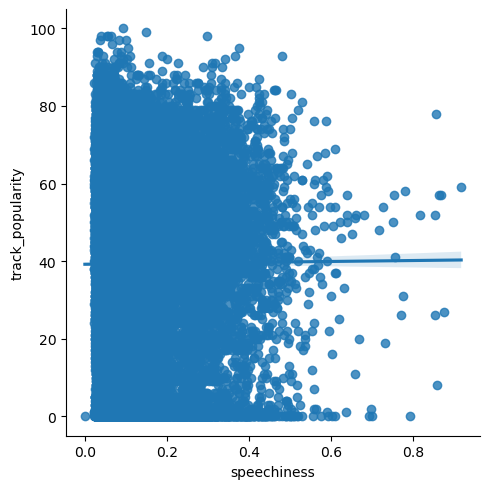

In [95]:
sns.lmplot(data=unique_songs_copy, x='speechiness', y='track_popularity')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


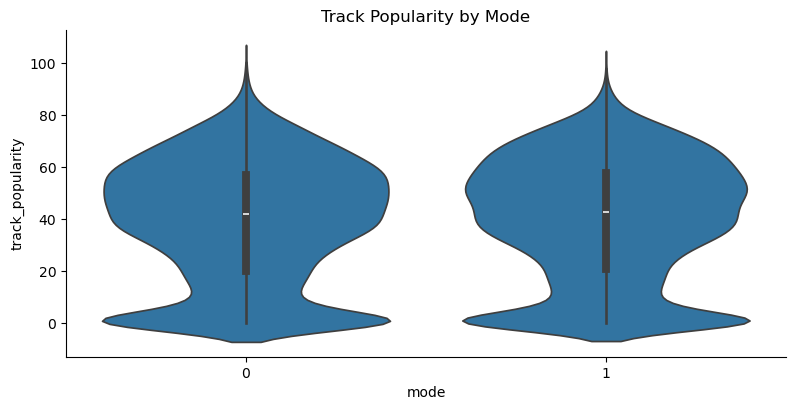

In [96]:
sns.catplot(data=unique_songs_copy, x='mode', y='track_popularity', kind='violin', height=4, aspect=2)

plt.title('Track Popularity by Mode'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


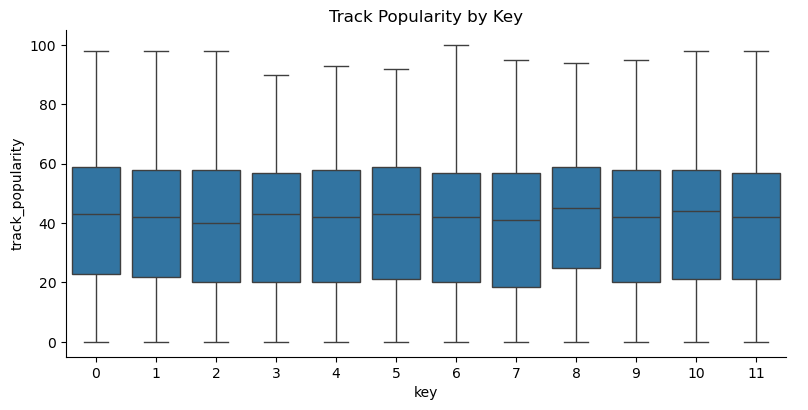

In [97]:
sns.catplot(data=unique_songs_copy, x='key', y='track_popularity', kind='box', height=4, aspect=2)

plt.title('Track Popularity by Key'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


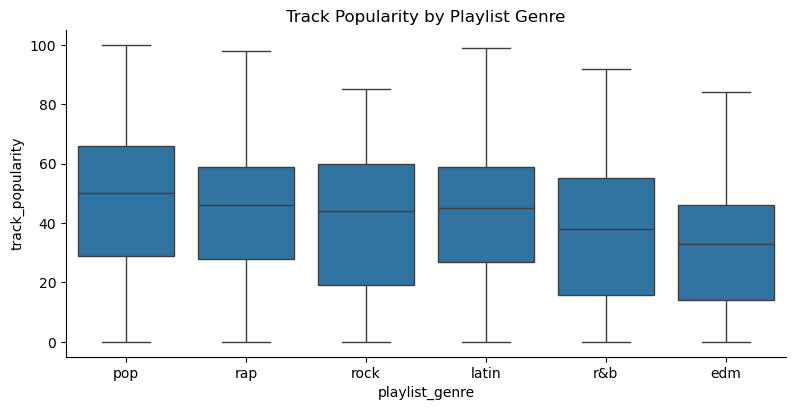

In [98]:
sns.catplot(data=unique_songs_copy, x='playlist_genre', y='track_popularity', kind='box', height=4, aspect=2)

plt.title('Track Popularity by Playlist Genre'); plt.show()

#### Summary

* We can see that there is a slight difference in the violin plots around the track popularity of 40-60, with the rest of the graph looking almost identical
* We can notice that the key variations are mostly the same as well, the `8` key has a slightly higher average than the others
* Looking at the playlist, it appears that the pop genre slightly out-performs the other playlist genres in this category! (might be worth making note of this)

Let's explore the `playlist_genre` more by looking at some visualizations:

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


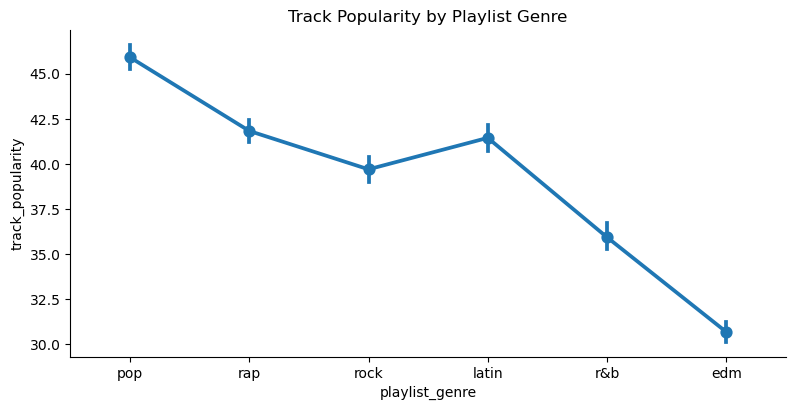

In [99]:
sns.catplot(data=unique_songs_copy, x='playlist_genre', y='track_popularity', kind='point', height=4, aspect=2)

plt.title('Track Popularity by Playlist Genre'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


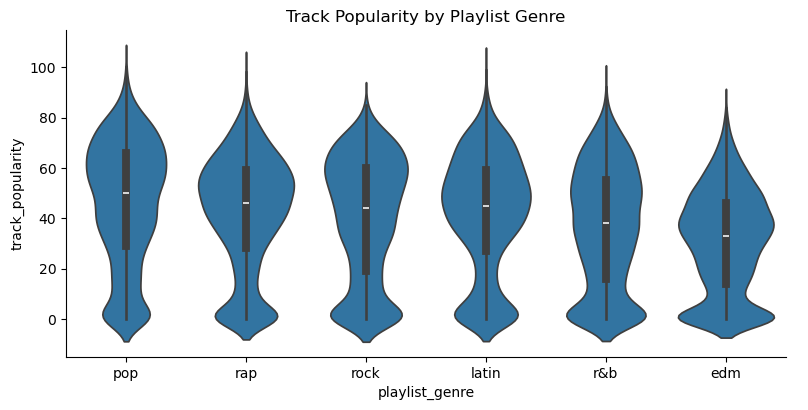

In [100]:
sns.catplot(data=unique_songs_copy, x='playlist_genre', y='track_popularity', kind='violin', height=4, aspect=2)

plt.title('Track Popularity by Playlist Genre'); plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


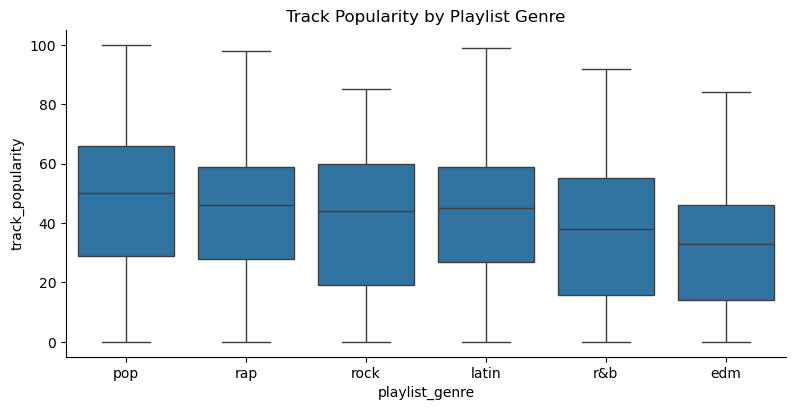

In [101]:
sns.catplot(data=unique_songs_copy, x='playlist_genre', y='track_popularity', kind='box', height=4, aspect=2)

plt.title('Track Popularity by Playlist Genre'); plt.show()

In [102]:
unique_songs_copy['playlist_genre'].value_counts()

playlist_genre
rap      5401
pop      5132
edm      4877
r&b      4504
rock     4305
latin    4137
Name: count, dtype: int64

#### Analyzing the results of `playlist_genre` and `track_popularity`:

While pop is the second highest count in the genres, it holds the best average for a higher track popularity than other genres!

Across the genres, we can see that **pop** shows the highest median popularity in the boxplot. It also shows the highest mean in the point plot!

We can see that the violin's density is concentrated in the upper half, indicating that there are many pop tracks at higher popularity.

Understanding this, it suggest that **pop** tracks tend to be more popular on average and shows a higher frequency in `track_popularity` than other genres.


#### Problem C:


I believe that since `pop` is the leading genre, variables that I hypothesis will fit well for this would be using continuous inputs `energy` and `danceability`

Let's first set the variables for this exploration:

In [103]:
unique_songs_features = ['energy', 'danceability']

In [104]:
unique_songs_copy[unique_songs_features].isna().sum()

energy          0
danceability    0
dtype: int64

In [105]:
unique_songs_copy[unique_songs_features].nunique()

energy          952
danceability    822
dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


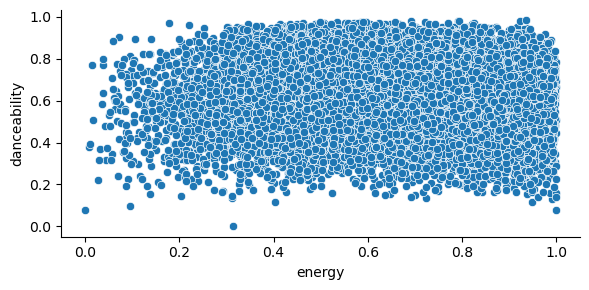

In [106]:
sns.relplot(data=unique_songs_copy, x='energy', y='danceability', kind='scatter', height=3, aspect=2)

plt.show()

In [107]:
X = unique_songs_copy[unique_songs_features].copy()

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
X_scaled = StandardScaler().fit_transform(X)

#### Cluster Analysis

In [110]:
from sklearn.cluster import KMeans

In [111]:
%whos

Variable                Type         Data/Info
----------------------------------------------
K                       range        range(1, 11)
KMeans                  ABCMeta      <class 'sklearn.cluster._kmeans.KMeans'>
StandardScaler          type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                       DataFrame           energy  danceabili<...>n[28356 rows x 2 columns]
X_scaled                ndarray      28356x2: 56712 elems, type `float64`, 453696 bytes (443.0625 kb)
df                      DataFrame                         trac<...>[32833 rows x 23 columns]
df_use                  DataFrame                         trac<...>[32833 rows x 23 columns]
k                       int          1
np                      module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                      module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                     module       <module 'matplotlib.pyplo<...>\\matplotlib

In [112]:
cluster = KMeans(n_clusters=2, n_init=25, random_state=121).fit_predict(X_scaled)

In [113]:
unique_songs_copy['cluster'] = pd.Series(cluster, index=X.index).astype('category')

In [114]:
unique_songs_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     28356 non-null  object        
 1   track_name                   28352 non-null  object        
 2   track_artist                 28352 non-null  object        
 3   track_popularity             28356 non-null  int64         
 4   track_album_id               28356 non-null  object        
 5   track_album_name             28352 non-null  object        
 6   track_album_release_date     28356 non-null  object        
 7   playlist_name                28356 non-null  object        
 8   playlist_id                  28356 non-null  object        
 9   playlist_genre               28356 non-null  object        
 10  playlist_subgenre            28356 non-null  object        
 11  danceability                 28356 non-null  f

In [115]:
cluster_sizes = unique_songs_copy['cluster'].value_counts()

In [116]:
cluster_sizes

cluster
1    15350
0    13006
Name: count, dtype: int64

In [117]:
cluster_means = unique_songs_copy.groupby('cluster')[unique_songs_features].mean().round(2)

In [118]:
cluster_means

,energy,danceability
cluster,,
0,0.55,0.72
1,0.82,0.60


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


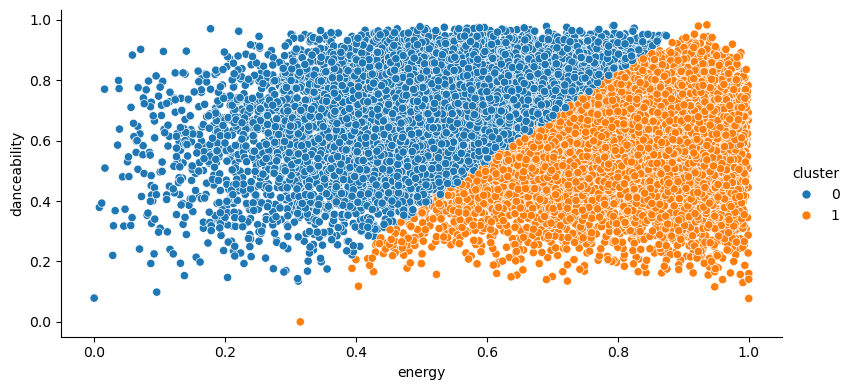

In [119]:
sns.relplot(data=unique_songs_copy, x='energy', y='danceability', hue='cluster', kind='scatter', height=4, aspect=2)

plt.show()

Here we can notice that there is very little to no overlap between the clusters, indicating little correlation between the two variables

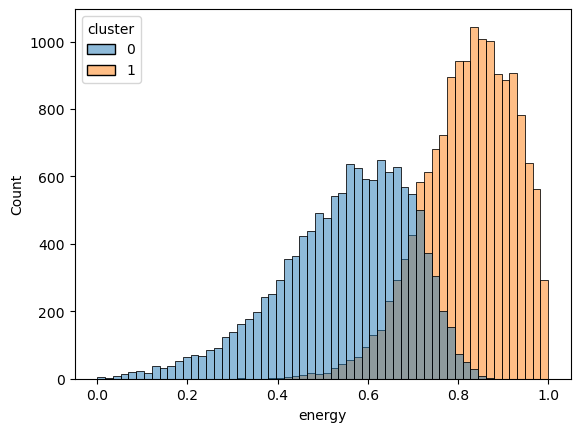

In [120]:
fig, ax = plt.subplots()

sns.histplot(data=unique_songs_copy, x='energy', hue='cluster')

plt.show()

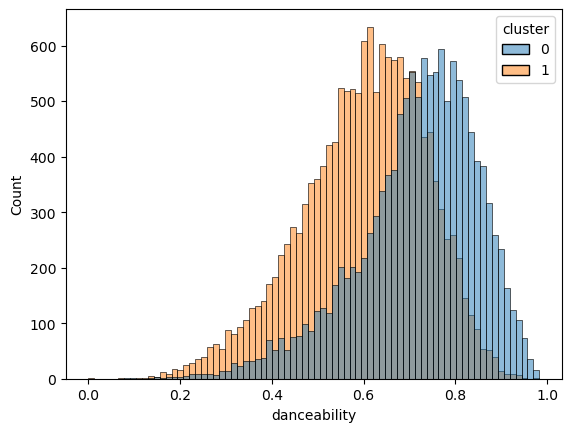

In [121]:
fig, ax = plt.subplots()

sns.histplot(data=unique_songs_copy, x='danceability', hue='cluster')

plt.show()

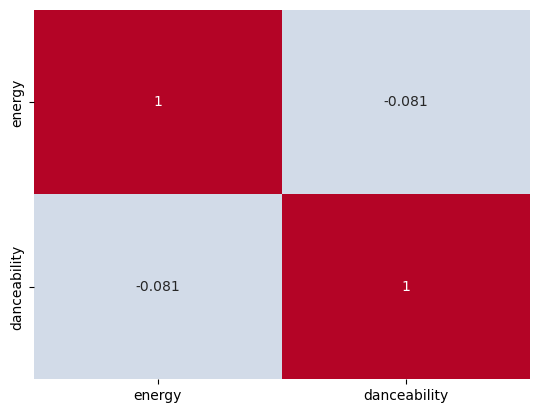

In [122]:
corr = unique_songs_copy[unique_songs_features].corr()

fig, ax = plt.subplots()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True, cbar=False, ax=ax)

plt.show()

#### Comprehending the Heatmap:

* In summary, the heatmap shows energy vs. danceability at `r = -0.081`, meaning that there is virtually no linear relationship
* This supports using both of the features for clustering as they contribute information that is independent from eachother


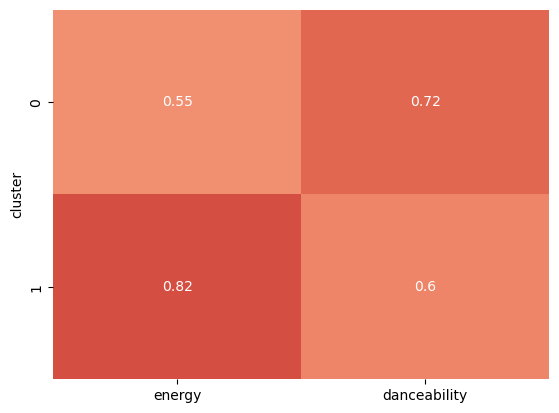

In [123]:
fig, ax = plt.subplots()

sns.heatmap(cluster_means, vmin=-1, vmax=1, center=0, cmap='coolwarm', annot=True, cbar=False, ax=ax)

plt.show()

The heatmap of the `cluster_means` shows a clear trade-off:

* **Cluster 1** has higher energy but lower danceability than **Cluster 0** and vice versa
* (0.55 vs 0.82) and (0.72 vs 0.6)

This aligns with the weak correlation between energy and danceability, represented by r = -0.081 and is consistent with the other visualizations

In [124]:
len(X)

28356

We will use a range of 1-10 as 28356 is not logical for the elbow plot, this range also avoids the potential of melting my laptop

In [125]:
tots_within=[]

K = range(1, 11) 
for k in K:
    km = KMeans(n_clusters=k, n_init=25, random_state=121, max_iter=500)
    km.fit(X_scaled)
    tots_within.append(km.inertia_)

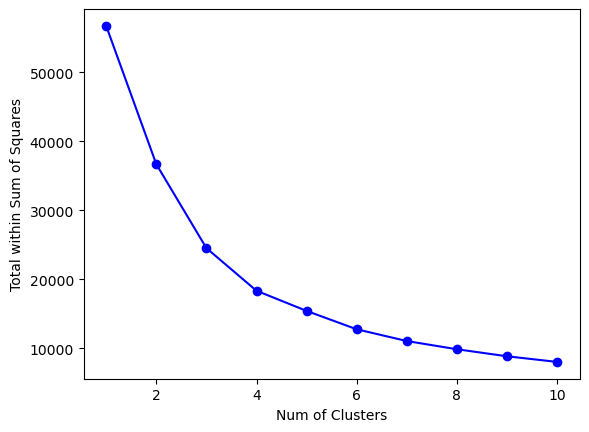

In [126]:
fig, ax = plt.subplots()
ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('Num of Clusters')
ax.set_ylabel('Total within Sum of Squares')

plt.show()

Looking at the elbow plot, the inertia drops steeply from k=1 to k=2, and then flattens substantially after k=2-4. 

This aligns with the cluster summaries and visualizations. 

### Summary:

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


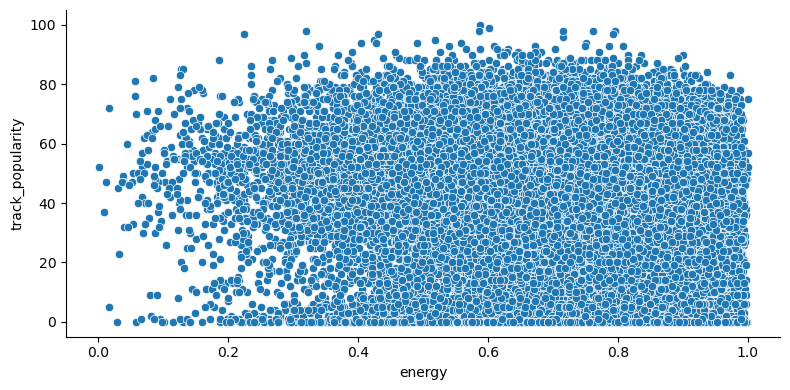

In [128]:
sns.relplot(data=unique_songs_copy, x='energy', y='track_popularity', kind='scatter', height=4, aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


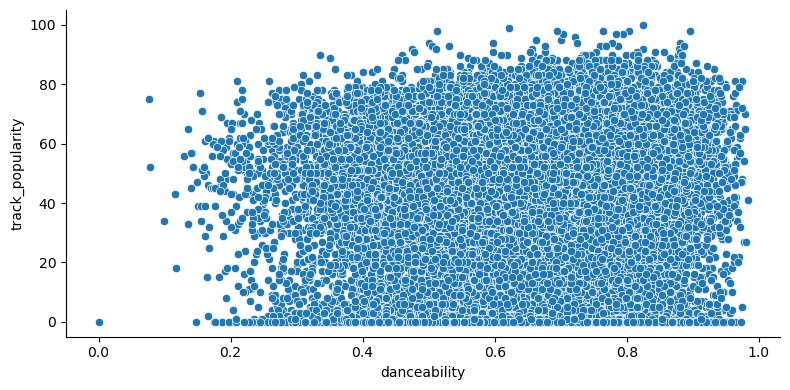

In [129]:
sns.relplot(data=unique_songs_copy, x='danceability', y='track_popularity', kind='scatter', height=4, aspect=2)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


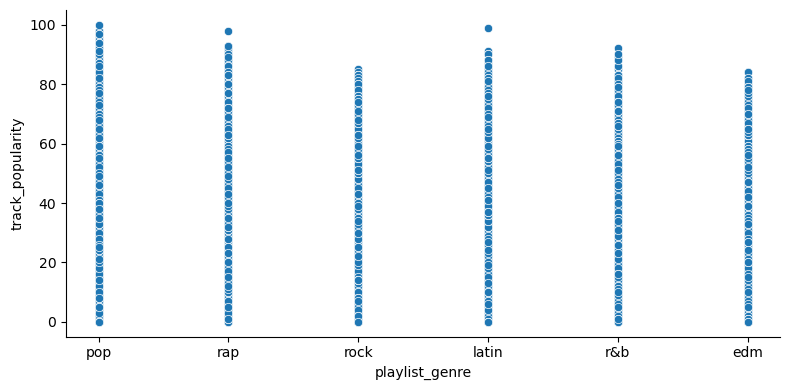

In [130]:
sns.relplot(data=unique_songs_copy, x='playlist_genre', y='track_popularity', kind='scatter', height=4, aspect=2)

plt.show()

#### Problem A.g:

* From the scatterplots with `track_popularity` on the y-axis, we can see that energy shows a more upward trend with popularity than that of danceability
* The correlation heatmap for the inputs shows that r = -0.081 indicating that each variable contributes largely independent information
* The k=2 solution seperates the data into a trade-off that we obsered:
  * Cluster 1: high energy(0.82) and lower danceability(0.6)
  * Cluster 0: significantly lower energy(0.55) and higher danceability(0.72)
  * This aligns with the weak correlation and explains the patterns in the scatter plots and histograms
* The elbow plot shows the largest drop from k=1 to k=2, and then a clear flattening. This keeps k=2 justified

In conclusions to our EDA, I believe that both energy and danceability relate to `track_popularity` score. However, I beleieve that energy shows more of an upward trend with popularity as danceability shows a slightly weaker and less consistent relationship. 